In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from __future__ import division
from scipy.stats import norm
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
sns.set(style='white', context='notebook', palette='deep')

# *Loading DataSet*

In [4]:
train_df = pd.read_csv("C:/Users/HP/Downloads/train_processed.csv")
print(train_df.shape)
train_df.head()

(1482535, 14)


,id,title,item_condition,item_type,item_brand,price,shipping_category,description,item_characteristic_n,item_characteristic_p,item_origin,item_flag_available,post_stats,approved_poster
0,1459601,UBWY Tbpty Zpbh3gbpnzrpw Wrf Fbrxt,1,Beauty/Makeup/Lips,Tbpty,13.0,1,Ujbaf Dbarwg USWN SOT WRARTYN YNRTRSX IPBXN XY...,10.138889,48,4,0,22976,False
1,1334924,Uywdry utrcq,2,Electronics/Cameras & Photography/Camera & Pho...,NaN,3.0,1,Iwbcq Gsouy uywdry utrcq. Yltyxnbiwy. Fwozu rx...,5.198556,18,3,0,147631,False
2,215759,Tbxzyprxy Issq,3,Other/Books/Literature & Fiction,NaN,7.0,1,FPRCY DRPA XS WYUU Tbxzyprxy ig Ynjbpn Iwssp P...,8.351304,18,5,0,1266811,False
3,964284,Cpyj xycq,3,Women/Sweaters/Crewneck,NaN,10.0,1,Xs nyucprftrsx gyt,6.849827,16,7,0,518287,False
4,1159166,UOFYPUBWY 2016 XYJ IWOYTSSTM UABPT JBTCM,1,Electronics/Cell Phones & Accessories/Cell Pho...,NaN,28.0,1,* Xyj 100% rx Pytbrw Isl * Mrzm-vobwrtg abny *...,3.674306,56,2,0,323393,False


# *Target Visualization*

There are a total of *1482535* item listings with *14* different features.

In [5]:
train_df['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

## *1. Checking Normality*

C:\ProgramData\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 26.74 and sigma = 38.59



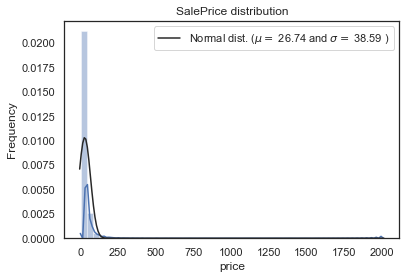

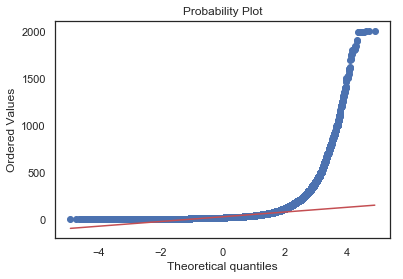

Skewness: 11.393232
Kurtosis: 283.821669


In [4]:
# Visualizing the target variable

def check_normality(df_val):
    sns.distplot(df_val , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df_val)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')

    fig = plt.figure()
    res = stats.probplot(df_val, plot=plt)
    plt.show()

    print("Skewness: %f" % df_val.skew())
    print("Kurtosis: %f" % df_val.kurt())
    
check_normality(train_df['price'])
    


Looking at the kurtosis score, we can see that there is a very nice peak. However, looking at the skewness score, we can see that the sale prices deviate from the normal distribution. We want our data to be as "normal" as possible. 

## *2. Removing Outliers* 


 mu = 23.46 and sigma = 20.45



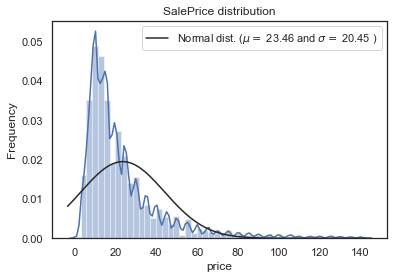

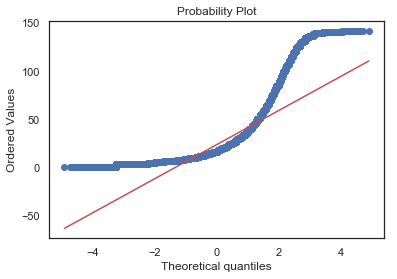

Skewness: 2.387920
Kurtosis: 7.095578


In [5]:
# Removing outliers
train_df =train_df[(np.abs(stats.zscore(train_df['price'])) < 3)]
# Checking normality
check_normality(train_df['price'])

Outlier removal has helped alot however there is still a distinct peak which is also indicated through a high kurtosis score. In addition, there is a significant left skew in the distribution which deviates it from a normal distribution.

## *3.Log Transformation*


 mu = 2.94 and sigma = 0.69



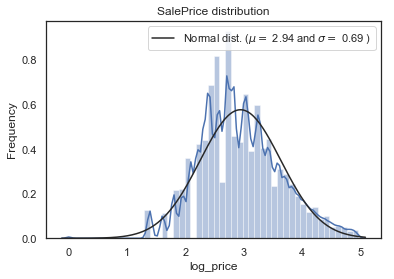

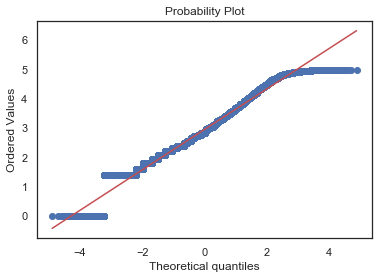

Skewness: 0.305160
Kurtosis: 0.048160


In [6]:
# Applying log-transform
train_df['log_price'] = np.round(np.log1p(train_df['price']),3)
# Checking normality
check_normality(train_df['log_price'])


It seems that the log transformation has solved the puzzle. Not only, the distribution resembles normal curve but the values of skewness and kurtosis indicate this as well.

# *Finding Missing Values*

In [7]:
#Checking for NaNs

var_nan = [var for var in train_df.columns if train_df[var].isnull().sum()>1]

for var in var_nan:
    print "Number of NaNs in feature ", var, " are : ", train_df[var].isnull().sum()
    print "Percentage of NaNs in feature ", var, " are : ",np.round(train_df[var].isnull().mean(),8), "%"

Number of NaNs in feature  item_type  are :  6235
Percentage of NaNs in feature  item_type  are :  0.00426867 %
Number of NaNs in feature  item_brand  are :  628196
Percentage of NaNs in feature  item_brand  are :  0.43008153 %
Number of NaNs in feature  description  are :  4
Percentage of NaNs in feature  description  are :  2.74e-06 %


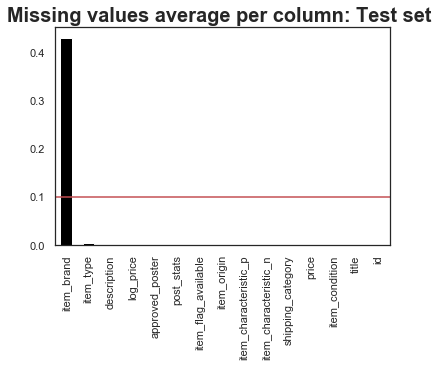

In [8]:
train_df.isnull().mean().sort_values(ascending=False).plot.bar(color='black')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.title('Missing values average per column: Test set ', fontsize=20, weight='bold' )
plt.show()

Our data contains a few missing values in certain features. We will need to account for these once we reach the feature engineering stage.

In [9]:
val_before = train_df.shape[0]
train_df = train_df.dropna()
val_after = train_df.shape[1]

print "Number of item listings dropped : ", val_before - val_after

Number of item listings dropped :  1460629


# *Numerical Features*

In [17]:
# Finding Numerical features

var_num = [var for var in train_df.columns if train_df[var].dtypes != 'O']
print "There are a total of ", len(var_num) - 1, " number of numerical features in the dataset"

train_df[var_num].head()

There are a total of  9  number of numerical features in the dataset


,id,item_condition,price,shipping_category,item_characteristic_n,item_characteristic_p,item_origin,item_flag_available,post_stats,approved_poster
0,1459601,1,13.0,1,10.138889,48,4,0,22976,0
1,1334924,2,3.0,1,5.198556,18,3,0,147631,0
2,215759,3,7.0,1,8.351304,18,5,0,1266811,0
3,964284,3,10.0,1,6.849827,16,7,0,518287,0
4,1159166,1,28.0,1,3.674306,56,2,0,323393,0


In [18]:
from __future__ import division

for var in var_num:
    print (train_df[var].nunique()/train_df.shape[0])*100, "% unique values in feature ", var

100.0 % unique values in feature  id
0.000337260165865 % unique values in feature  item_condition
0.0558502834672 % unique values in feature  price
0.000134904066346 % unique values in feature  shipping_category
100.0 % unique values in feature  item_characteristic_n
0.00553106672018 % unique values in feature  item_characteristic_p
0.000607068298556 % unique values in feature  item_origin
0.000134904066346 % unique values in feature  item_flag_available
63.5529683953 % unique values in feature  post_stats
0.000134904066346 % unique values in feature  approved_poster


As ***id*** and ***item_characterisitc_n*** are unique identifiers therefore they cannot be considered further in the analysis as they will not be helpful in the prediction.


## *1. Discrete Features* 

In [19]:
# Finding Discrete Variables

var_dis = [var for var in var_num if train_df[var].nunique() < 20]
print "There are a total of ", len(var_dis), " number of numerical features in the dataset"

There are a total of  5  number of numerical features in the dataset


In [20]:
# Cardinality of discrete variables

for var_d in var_dis:
    print "Cardinality of", var_d , ":",train_df[var_d].nunique()

Cardinality of item_condition : 5
Cardinality of shipping_category : 2
Cardinality of item_origin : 9
Cardinality of item_flag_available : 2
Cardinality of approved_poster : 2


Out of a total of 9 numerical features , 5 are discrete in nature while the remaining 5 are continuous.

### *Bar Graph Visualization*

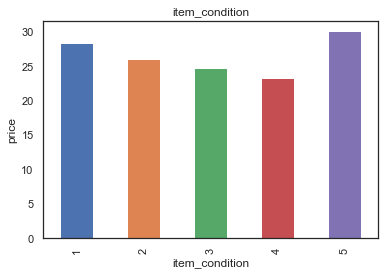

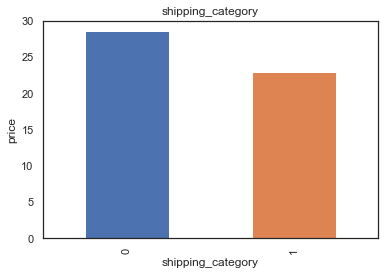

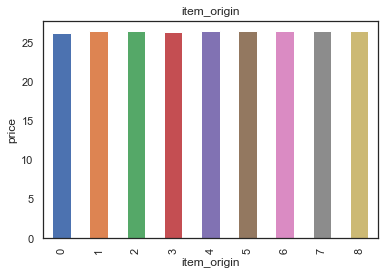

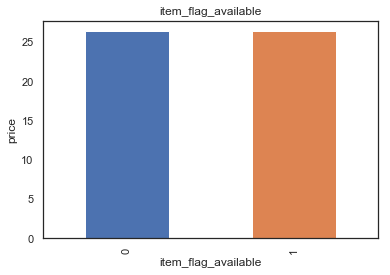

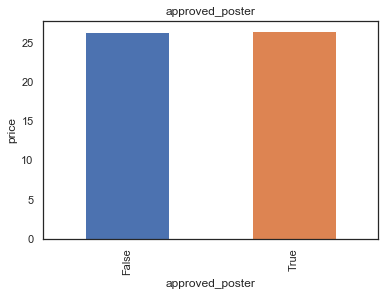

In [77]:
# Visualizing discrete features
def bar_plot_disc(df,var):
    df.groupby(var)['price'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('price')
    plt.show()
    
for var_d in var_dis:
    bar_plot_disc(train_df,var_d)

### *Box Plot Visualization*

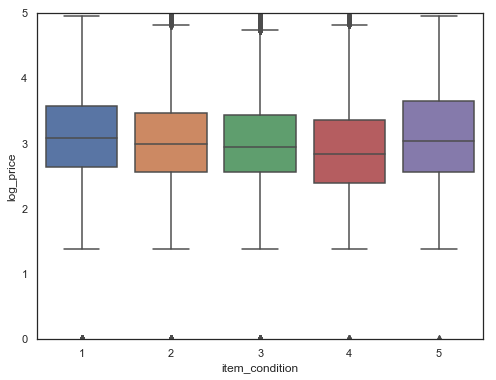

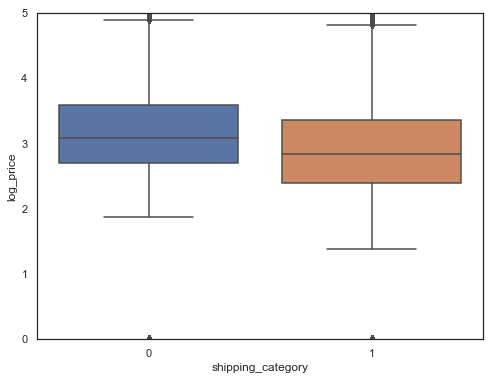

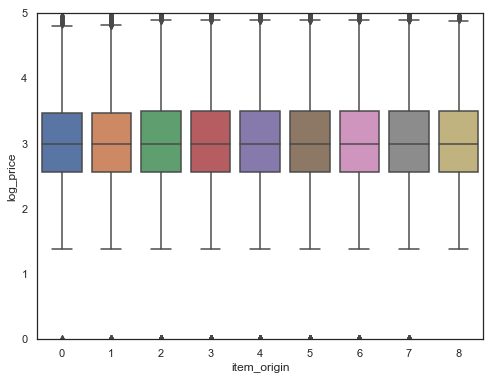

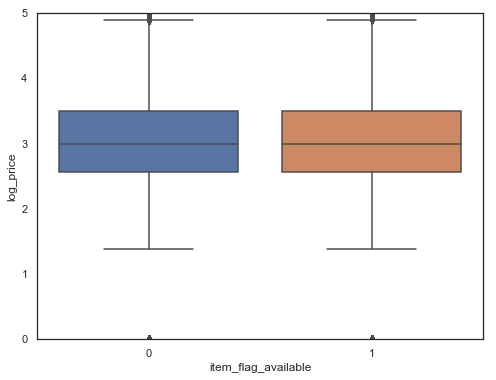

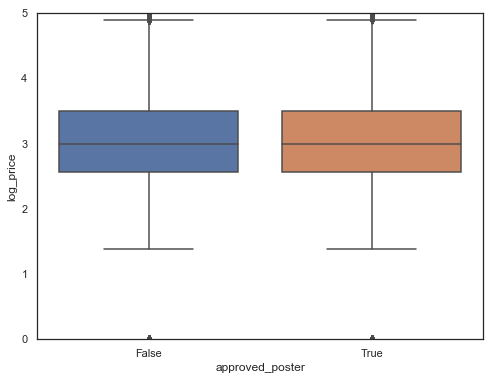

In [15]:
def box_plot_disc(df,var):
    data = pd.concat([df['log_price'], df[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="log_price", data=data)
    fig.axis(ymin=0, ymax=5)
    
for var_d in var_dis:
    box_plot_disc(train_df,var_d)


## *2. Continuos Features*

In [22]:
# Finding continuos features

var_cont = [var for var in var_num if var not in var_dis]
var_cont = [var for var in var_cont if var != 'price' and var != 'log_price' and var != 'id' ]
print "There are ", len(var_cont)," continuos variables in the data"

 

There are  3  continuos variables in the data


### *Histogram Visualization* 

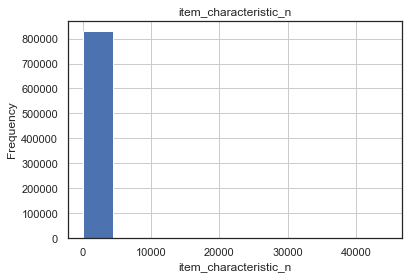

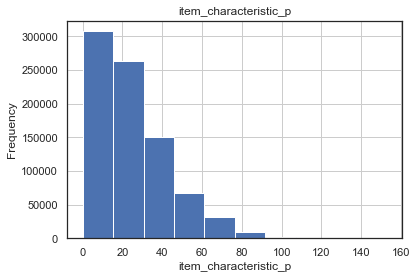

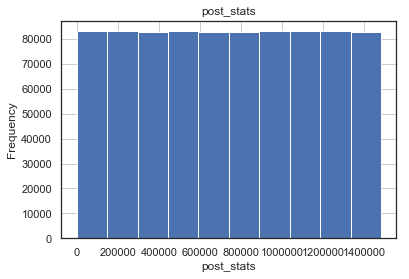

In [17]:
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist()
    plt.ylabel('Frequency')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in var_cont:
    analyse_continous(train_df, var)

### *Histogram Visualization (Log-Scale)*

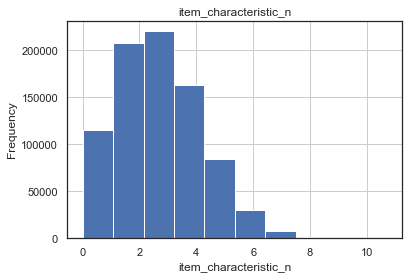

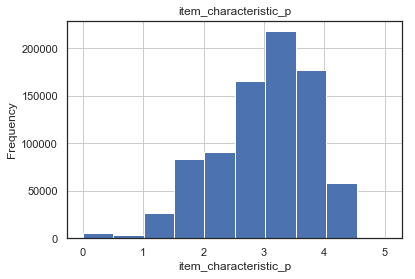

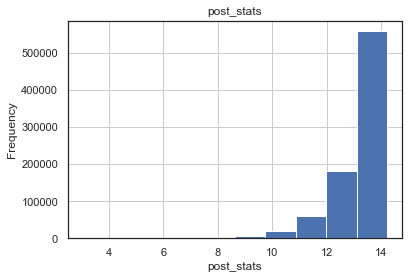

In [18]:
def analyse_continous_log(df, var):
    df = df.copy()
    df[var] = np.log1p(df[var])
    df[var].hist()
    plt.ylabel('Frequency')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in var_cont:
    analyse_continous_log(train_df, var)

### *Scatter Plot Visualization*

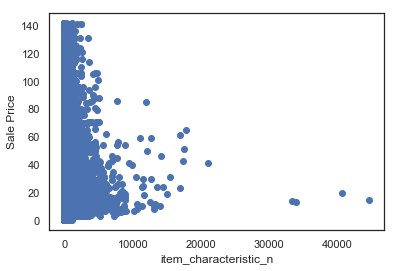

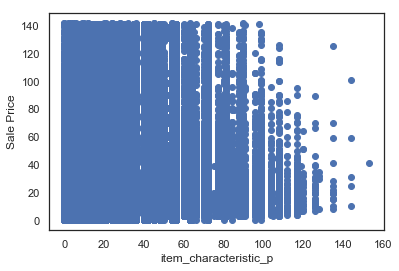

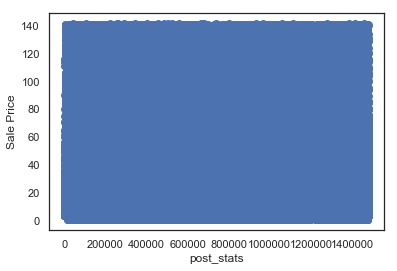

In [19]:
def analyse_scatter_continous(df, var):
    df = df.copy()
    plt.scatter(df[var], df['price'])
    plt.ylabel('Sale Price')
    plt.xlabel(var)
    plt.show()
    
for var in var_cont:
    analyse_scatter_continous(train_df, var)

### *Scatter Plot Visualization (Log)*

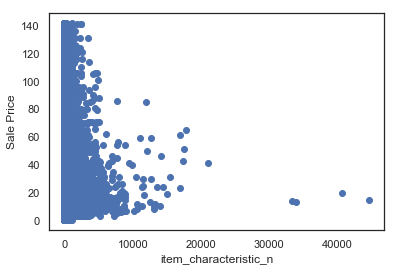

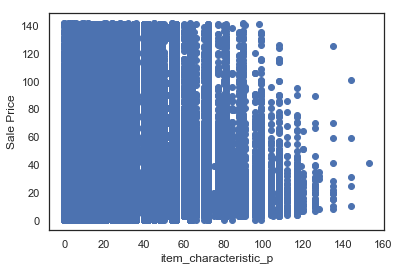

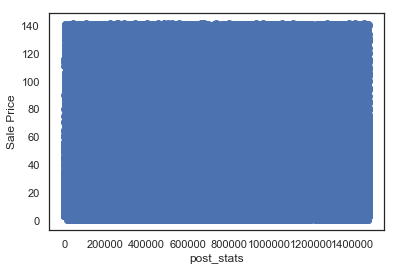

In [195]:
def analyse_scatter_continous_log(df, var):
    df = df.copy()
    df[var] = np.log1p(df[var]) 
    plt.scatter(df[var], df['log_price'])
    plt.ylabel('Sale Price')
    plt.xlabel(var)
    plt.show()
    
for var in var_cont:
    analyse_scatter_continous(train_df, var)

### *Correlation Matrix*

In [196]:
corr_list = var_cont + ["log_price","price"]
corrmat = train_df[corr_list].corr()
corrmat.style.background_gradient(cmap='coolwarm').set_precision(2)


,item_characteristic_n,item_characteristic_p,post_stats,log_price,price
item_characteristic_n,1,0.002,-0.0019,0.00067,5.2e-05
item_characteristic_p,0.002,1,-0.00049,-0.00029,-0.00039
post_stats,-0.0019,-0.00049,1,0.00051,0.0003
log_price,0.00067,-0.00029,0.00051,1,0.91
price,5.2e-05,-0.00039,0.0003,0.91,1


## *3.Categorical Variables*

In [20]:
# Finding Categorical features

var_cat = [var for var in train_df.columns if train_df[var].dtypes == 'O']
print "There are a total of ", len(var_cat), " number of numerical features in the dataset"
train_df[var_cat].head()

There are a total of  4  number of numerical features in the dataset


,title,item_type,item_brand,description
0,UBWY Tbpty Zpbh3gbpnzrpw Wrf Fbrxt,Beauty/Makeup/Lips,Tbpty,Ujbaf Dbarwg USWN SOT WRARTYN YNRTRSX IPBXN XY...
6,Arwwg Erf Fsocm,Women/Women's Handbags/Cosmetic Bags,Hrctsprb'u Uycpyt,"Ipbxn xyj, oxouyn Arwwg erf fsocm. Zpybt ts cb..."
8,Pyyisq uyt,"Women/Athletic Apparel/Pants, Tights, Leggings",Pyyisq,Pyyisq ufsptu ipb & wyzzrxz uyt. Ylcywwyxt Ouy...
9,Burnbu X Cbutrwws Aélrcs Kypuyg,Men/Athletic Apparel/Jerseys,Bnrnbu,Rx zssn csxnrtrsx pybw bnrnbu kypuyg
10,Hrctsprb uycpyt qxscqsot fbxtu wsxz XJT,"Women/Athletic Apparel/Pants, Tights, Leggings",Hrctsprb'u Uycpyt,Xs nyucprftrsx gyt


## *Generating Item Categories*

In [21]:
df_new = train_df
df_new['category'] = df_new['item_type'].apply(lambda cat: str(cat).split("/")[0])
df_new.head()


,id,title,item_condition,item_type,item_brand,price,shipping_category,description,item_characteristic_n,item_characteristic_p,item_origin,item_flag_available,post_stats,approved_poster,log_price,category
0,1459601,UBWY Tbpty Zpbh3gbpnzrpw Wrf Fbrxt,1,Beauty/Makeup/Lips,Tbpty,13.0,1,Ujbaf Dbarwg USWN SOT WRARTYN YNRTRSX IPBXN XY...,10.138889,48,4,0,22976,False,2.639,Beauty
6,426908,Arwwg Erf Fsocm,1,Women/Women's Handbags/Cosmetic Bags,Hrctsprb'u Uycpyt,12.0,1,"Ipbxn xyj, oxouyn Arwwg erf fsocm. Zpybt ts cb...",9.748283,18,3,0,1055675,False,2.565,Women
8,1008584,Pyyisq uyt,2,"Women/Athletic Apparel/Pants, Tights, Leggings",Pyyisq,20.0,1,Pyyisq ufsptu ipb & wyzzrxz uyt. Ylcywwyxt Ouy...,10.655698,6,4,0,473988,False,3.045,Women
9,366354,Burnbu X Cbutrwws Aélrcs Kypuyg,2,Men/Athletic Apparel/Jerseys,Bnrnbu,25.0,1,Rx zssn csxnrtrsx pybw bnrnbu kypuyg,2.420214,15,6,0,1116191,True,3.258,Men
10,453209,Hrctsprb uycpyt qxscqsot fbxtu wsxz XJT,1,"Women/Athletic Apparel/Pants, Tights, Leggings",Hrctsprb'u Uycpyt,37.0,0,Xs nyucprftrsx gyt,0.376800,45,3,0,1029329,False,3.638,Women


In [22]:
print"Number of unique categories : ", df_new['category'].nunique()
print df_new['category'].unique()

Number of unique categories :  10
['Beauty' 'Women' 'Men' 'Home' 'Electronics' 'Sports & Outdoors' 'Kids'
 'Vintage & Collectibles' 'Other' 'Handmade']


### *Visualizing Categories*

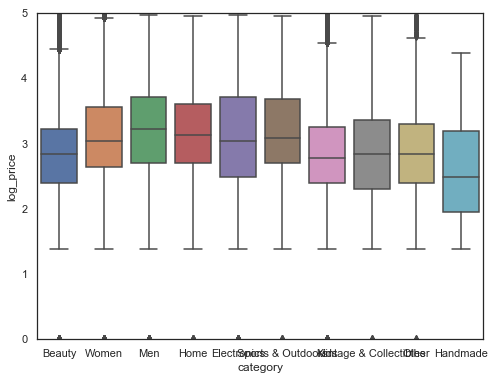

In [76]:
box_plot_disc(train_df,"category")

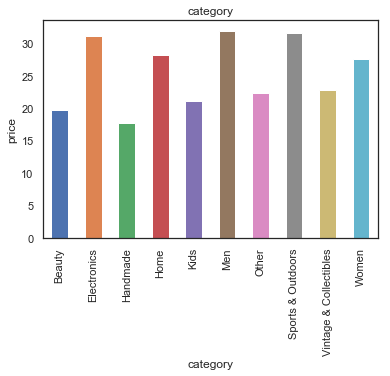

In [78]:
 bar_plot_disc(train_df,"category")

## *Selecting Top Brands (Item Frequency)*

In [25]:
train_brands = pd.DataFrame(train_df.groupby('item_brand')['title'].count())
train_brands.columns = ['title']
train_brands=train_brands[train_brands['title']>10000]
print"Number of brands selected : ",train_brands.shape[0]
train_brands.head()




Number of brands selected :  15


,title
item_brand,
Arcmbyw Qspu,12947
Bayprcbx Ybzwy,13182
Bffwy,14473
Csbcm,10192
DSPYHYP 21,15103


### *Top brand distribution with price*

In [26]:
df_limited = train_df[train_df['item_brand'].isin(train_brands.index)]

print df_limited.shape


(325110, 16)


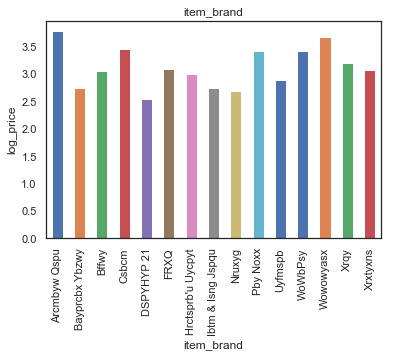

In [27]:
df_limited.groupby('item_brand')['log_price'].mean().plot.bar()
plt.title('item_brand')
plt.ylabel('log_price')
plt.show()

### *Top Brands Visualizations*

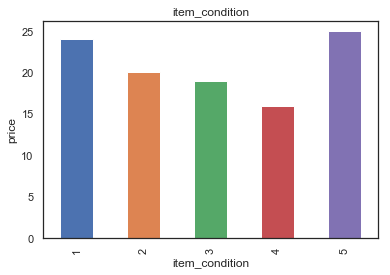

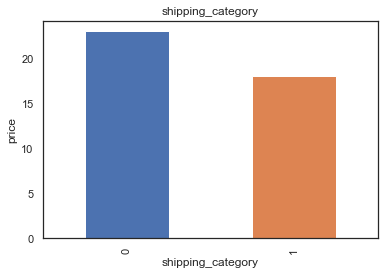

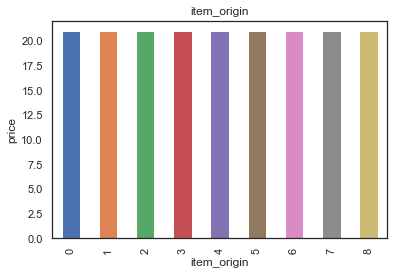

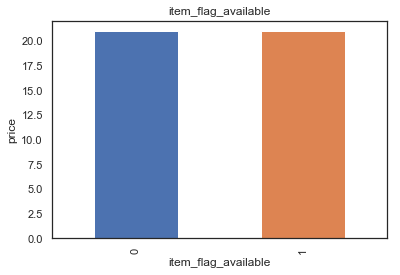

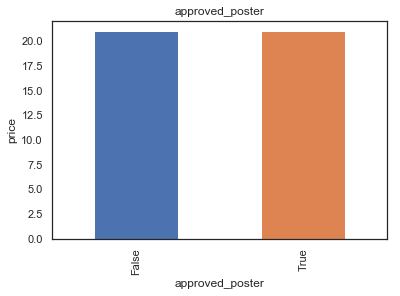

In [207]:
for var_d in var_dis:
     bar_plot_disc(df_limited,var_d)
    

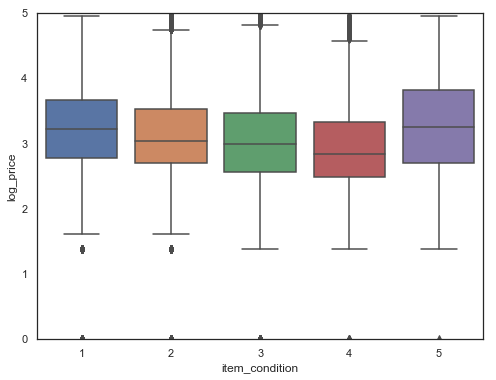

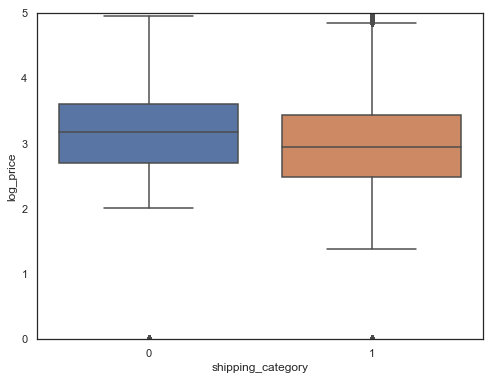

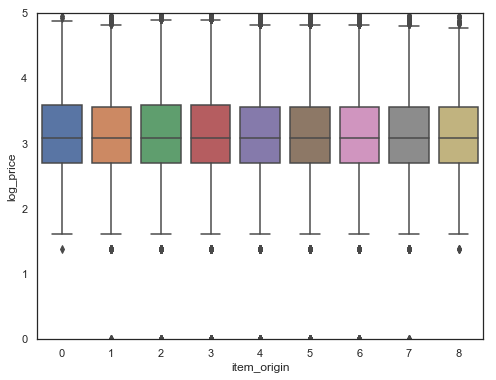

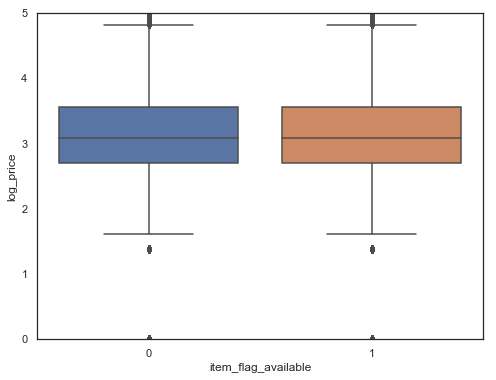

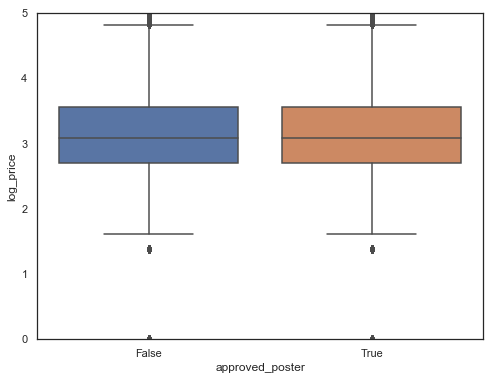

In [208]:
for var_d in var_dis:
    box_plot_disc(df_limited,var_d)

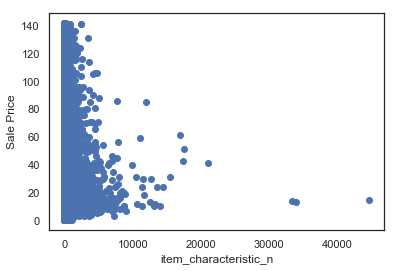

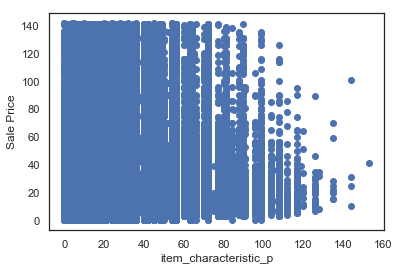

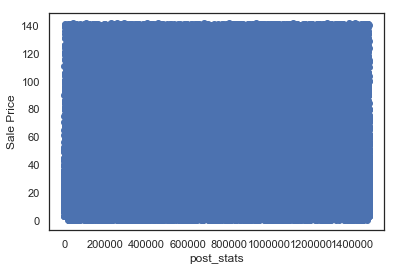

In [146]:
for var in var_cont:
    analyse_scatter_continous(df_limited, var)

In [209]:
corr_list = var_cont + ["log_price","price"]
corrmat = df_limited[corr_list].corr()
corrmat.style.background_gradient(cmap='coolwarm').set_precision(2)

,item_characteristic_n,item_characteristic_p,post_stats,log_price,price
item_characteristic_n,1,0.0051,-0.00047,0.00029,-0.00025
item_characteristic_p,0.0051,1,-0.0011,-0.0015,-0.0012
post_stats,-0.00047,-0.0011,1,-0.00012,-0.0011
log_price,0.00029,-0.0015,-0.00012,1,0.91
price,-0.00025,-0.0012,-0.0011,0.91,1


## *Different Categories Visualizations* 

('Category : ', 'Beauty')
(111295, 16)


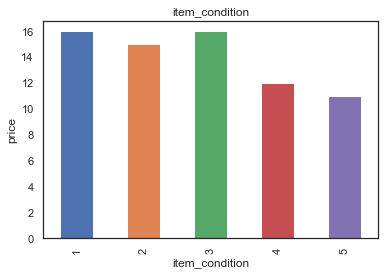

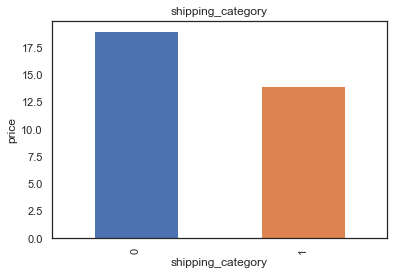

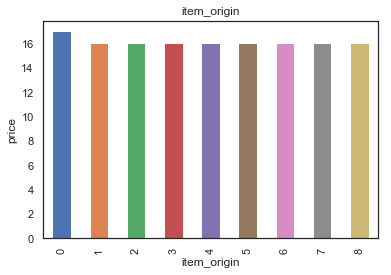

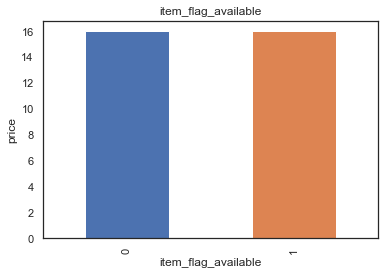

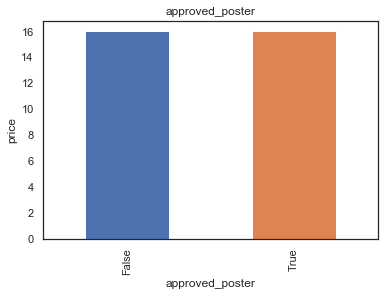

('Category : ', 'Women')
(446004, 16)


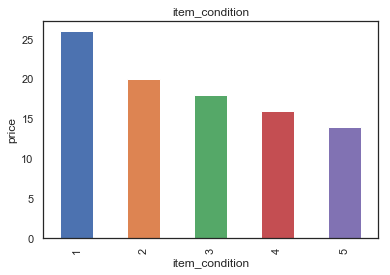

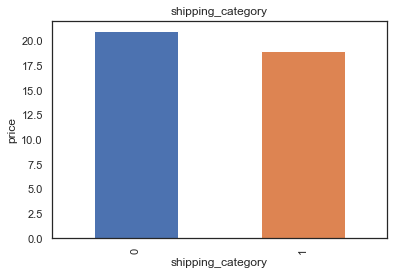

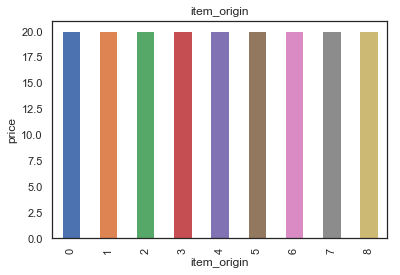

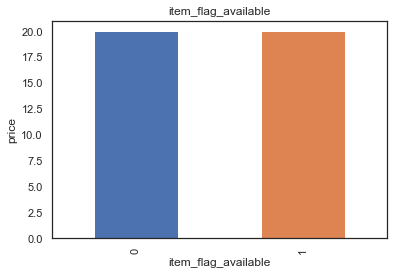

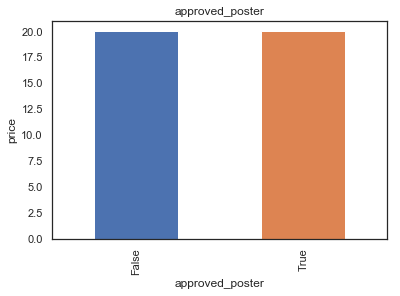

('Category : ', 'Men')
(68209, 16)


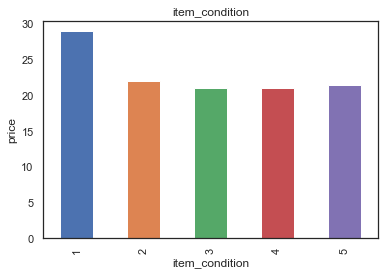

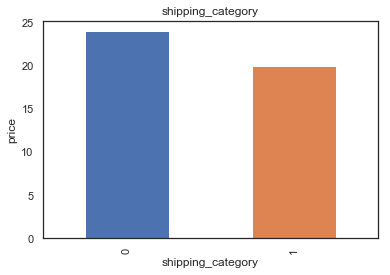

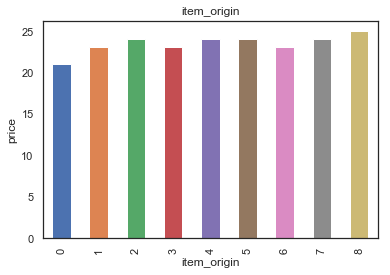

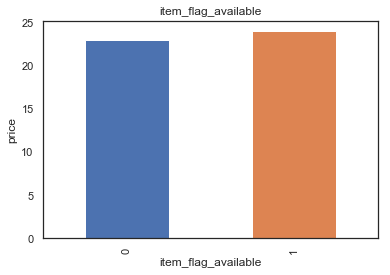

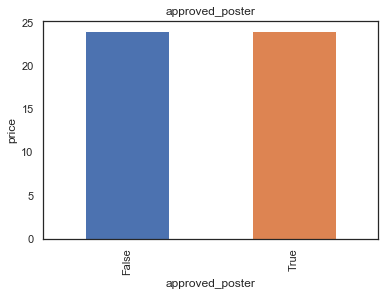

('Category : ', 'Home')
(26254, 16)


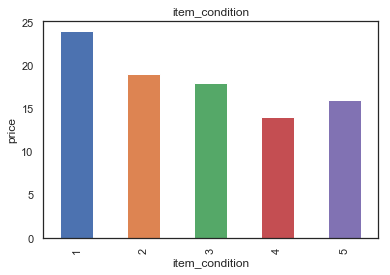

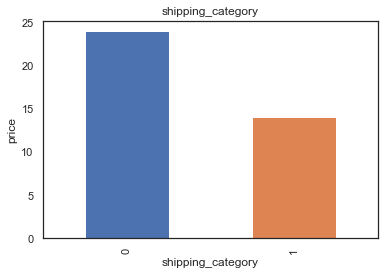

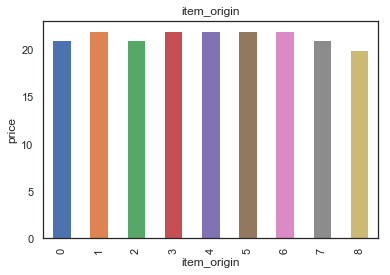

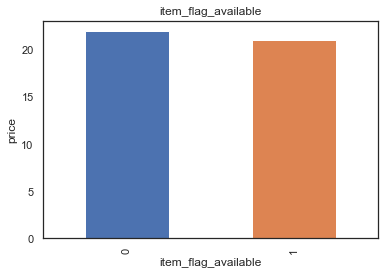

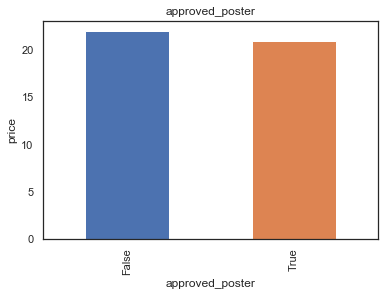

('Category : ', 'Electronics')
(54687, 16)


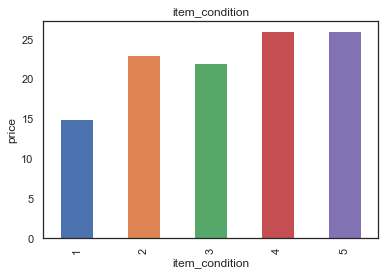

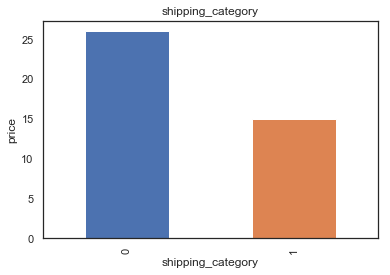

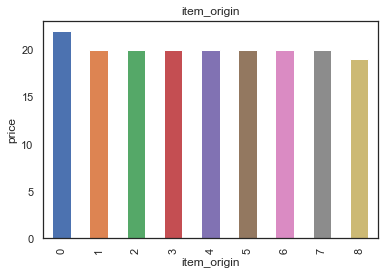

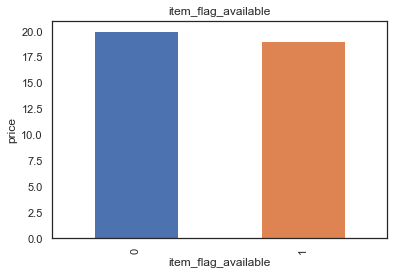

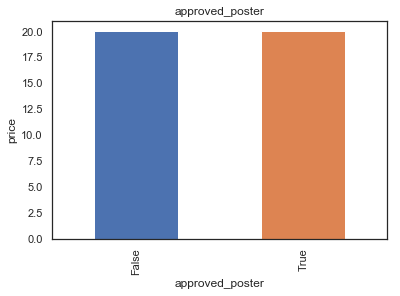

('Category : ', 'Sports & Outdoors')
(9119, 16)


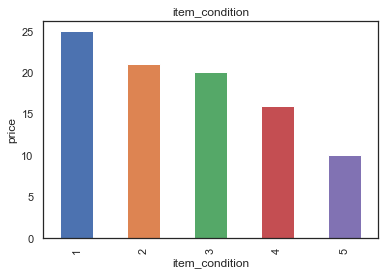

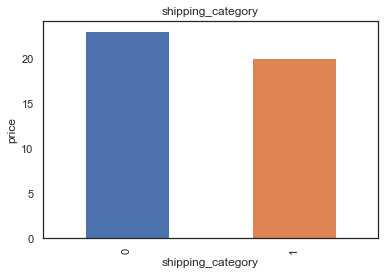

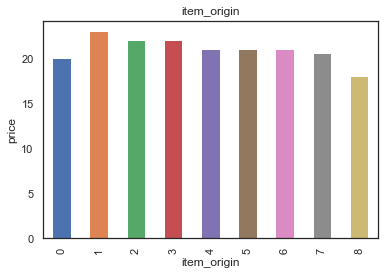

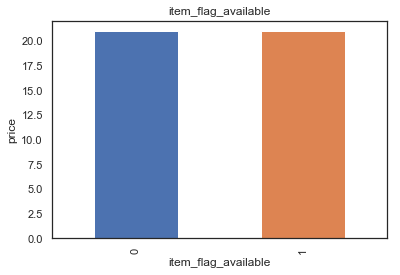

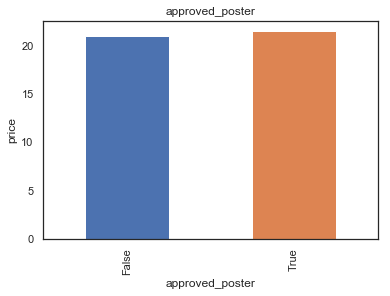

('Category : ', 'Kids')
(87259, 16)


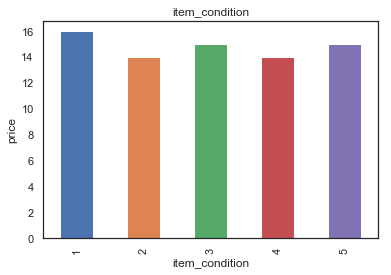

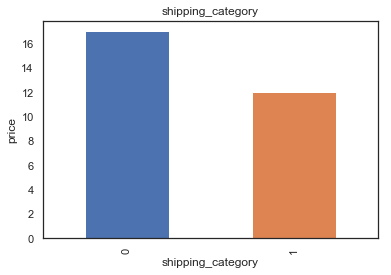

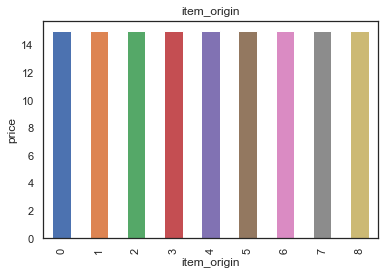

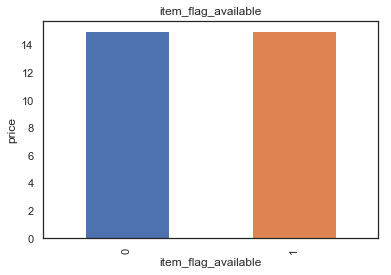

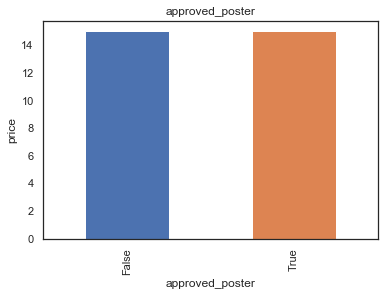

('Category : ', 'Vintage & Collectibles')
(20264, 16)


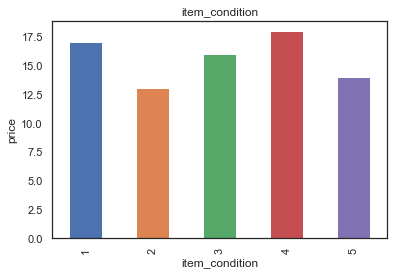

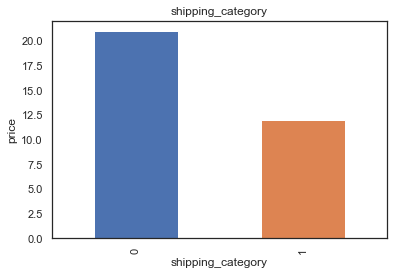

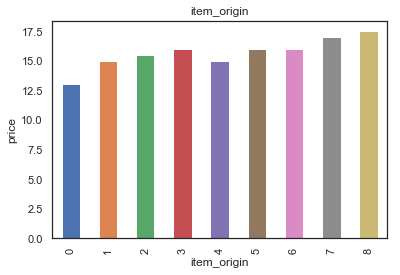

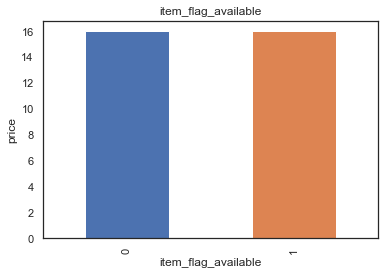

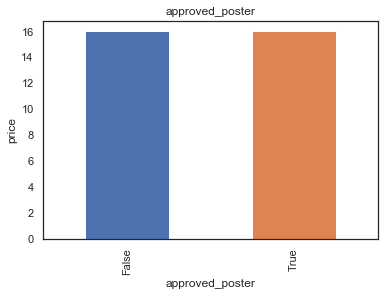

('Category : ', 'Other')
(6469, 16)


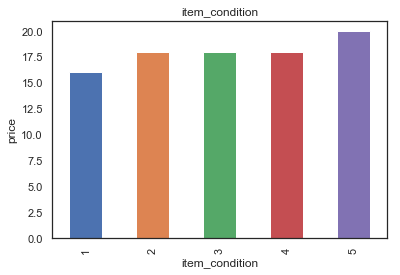

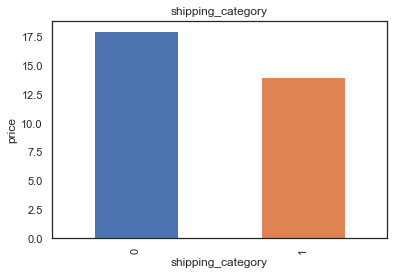

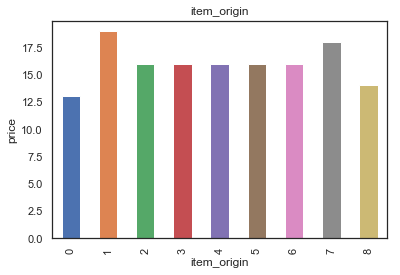

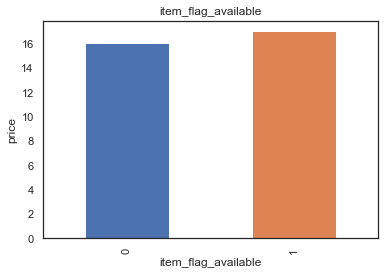

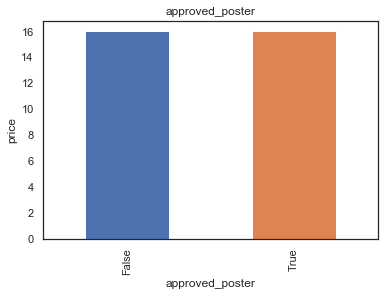

('Category : ', 'Handmade')
(70, 16)


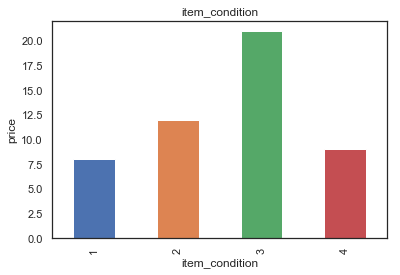

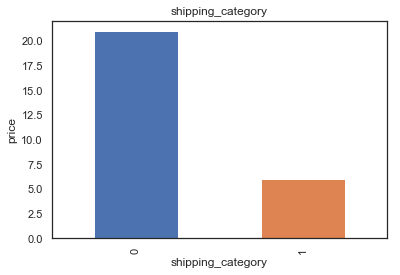

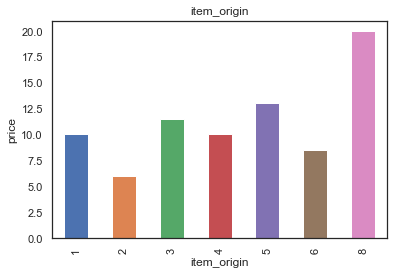

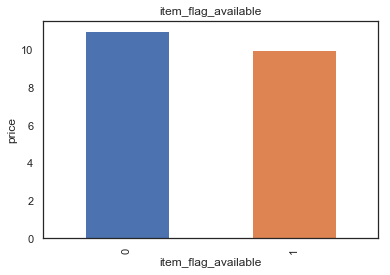

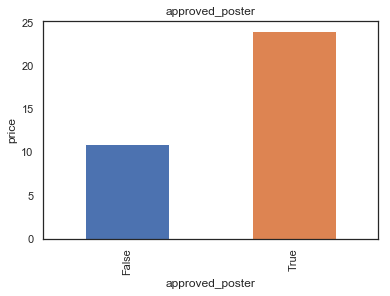

In [211]:
list_cat = df_new['category'].unique()
for cat in list_cat:
   
    df_temp = df_new[df_new['category']==cat]
    print("Category : ", cat)
    print(df_temp.shape)

    for var_d in var_dis:
        bar_plot_disc(df_temp,var_d)

('Category : ', 'Beauty')
(111295, 16)
('Category : ', 'Women')
(446004, 16)
('Category : ', 'Men')
(68209, 16)
('Category : ', 'Home')
(26254, 16)
('Category : ', 'Electronics')
(54687, 16)
('Category : ', 'Sports & Outdoors')
(9119, 16)
('Category : ', 'Kids')
(87259, 16)
('Category : ', 'Vintage & Collectibles')
(20264, 16)
('Category : ', 'Other')
(6469, 16)
('Category : ', 'Handmade')
(70, 16)


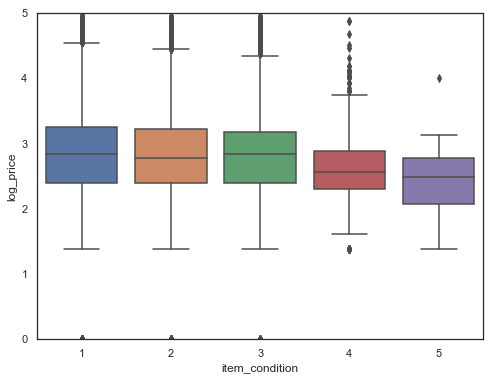

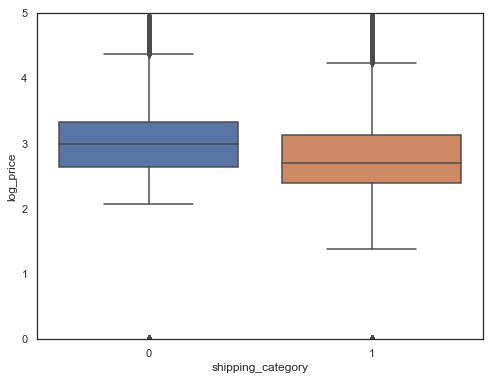

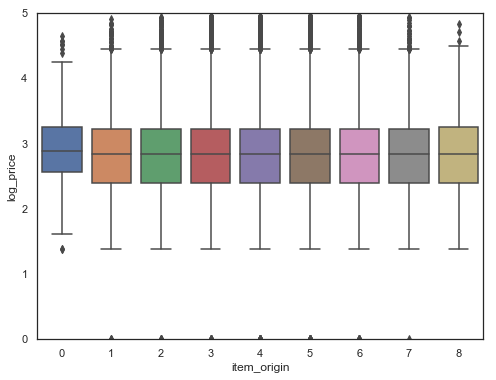

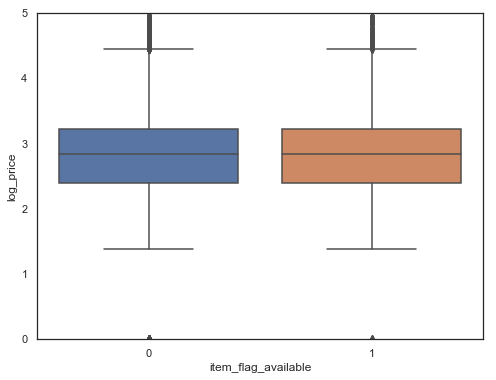

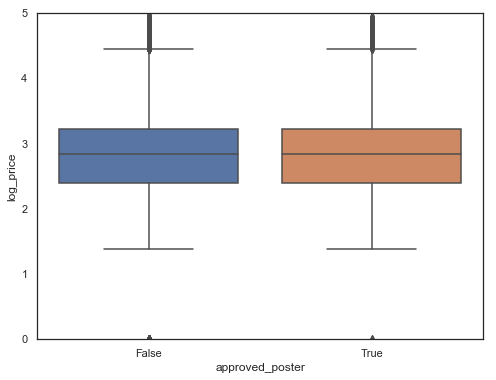

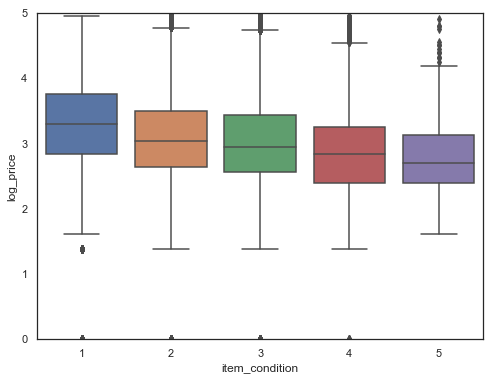

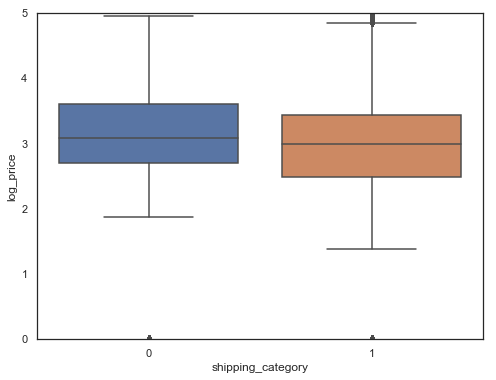

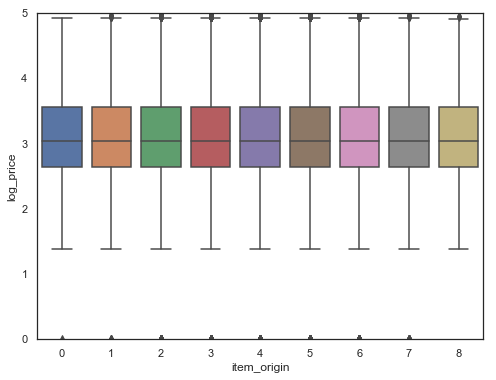

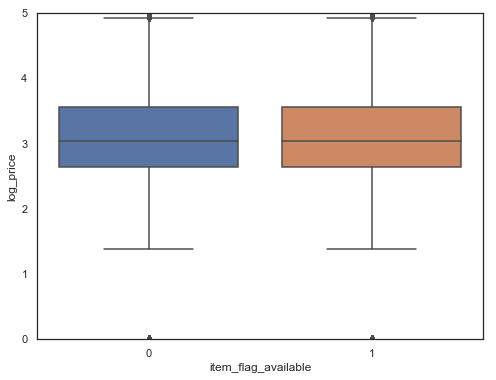

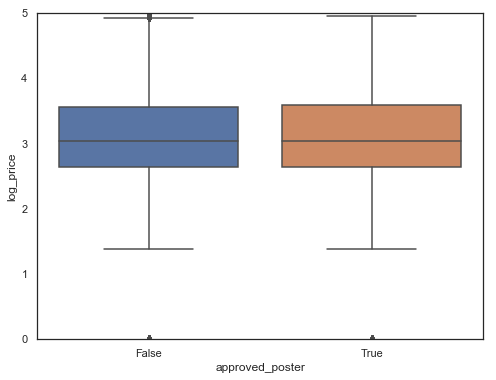

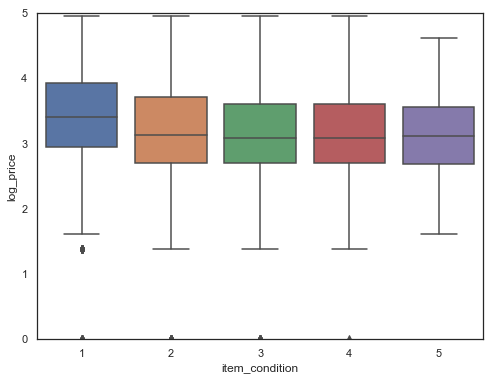

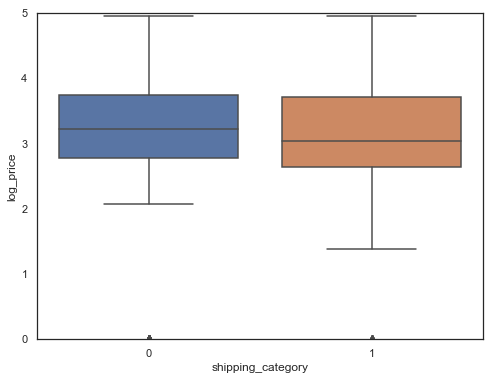

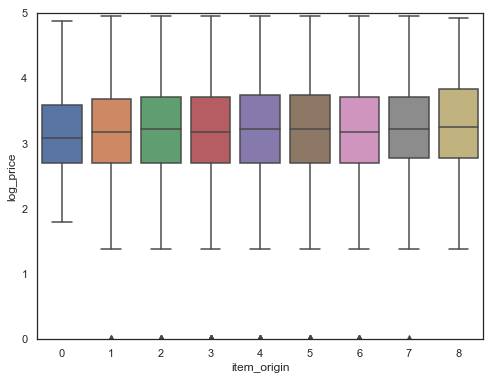

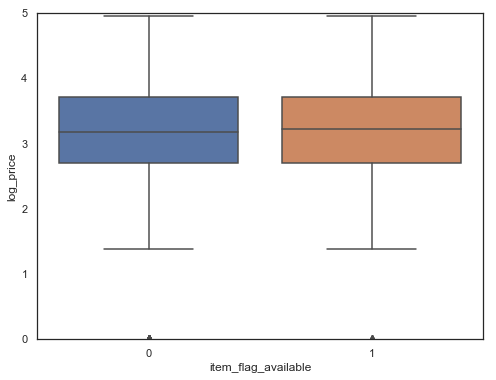

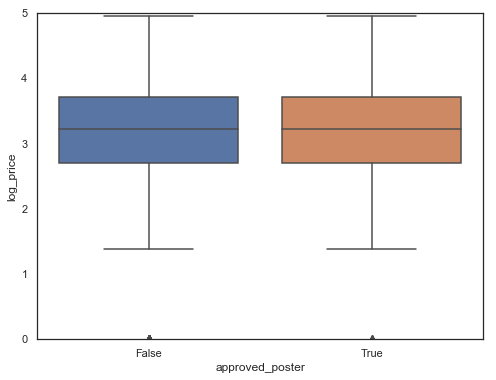

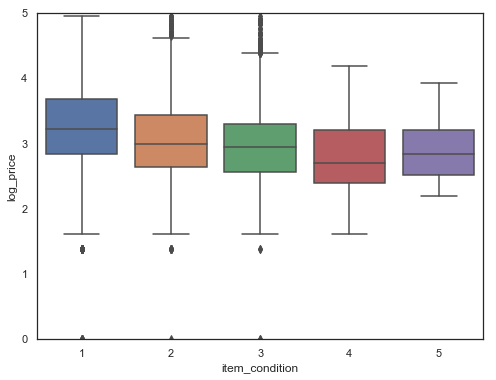

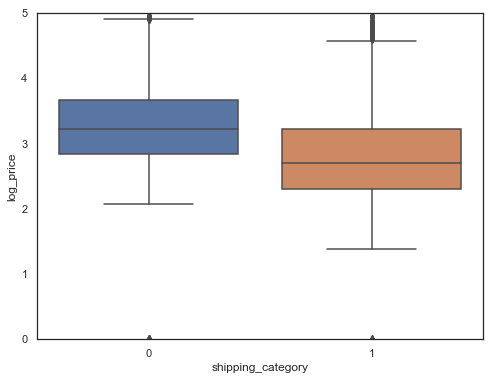

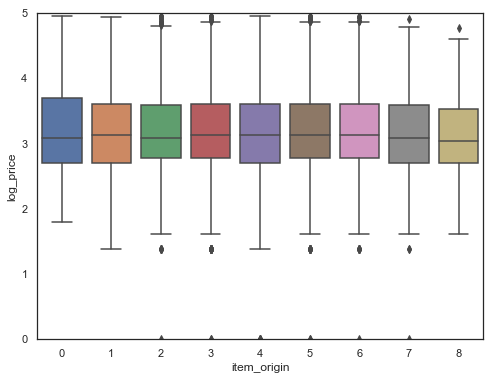

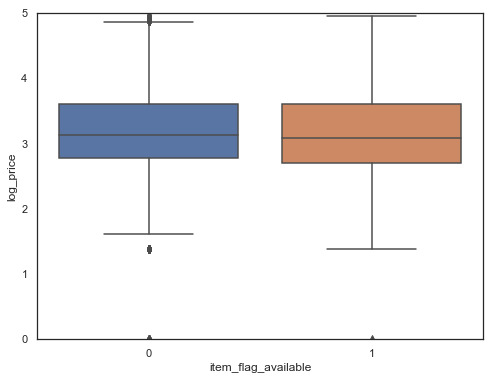

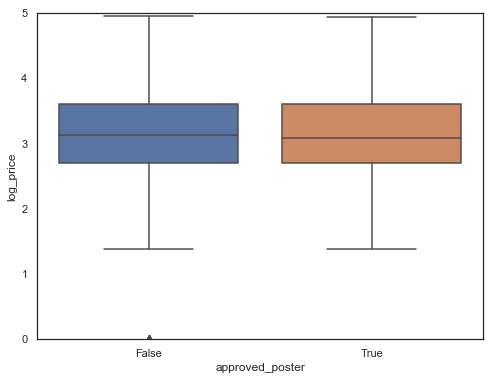

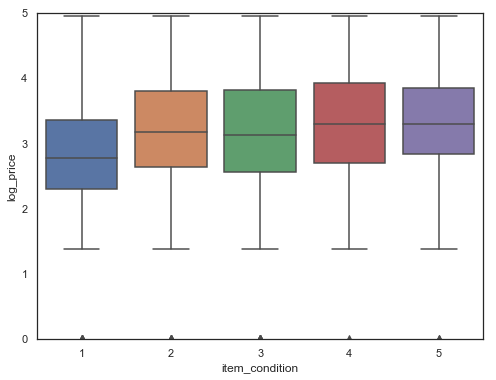

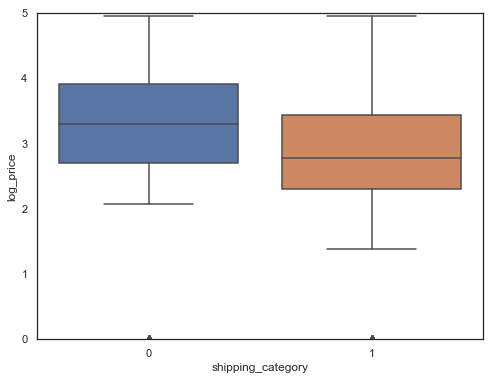

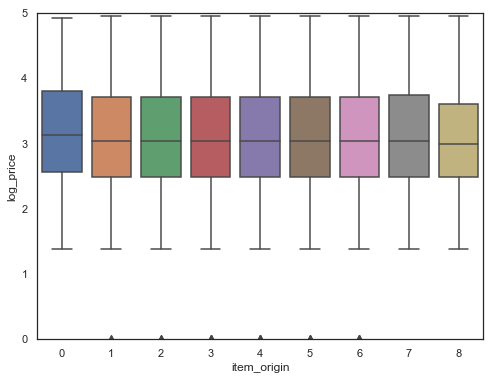

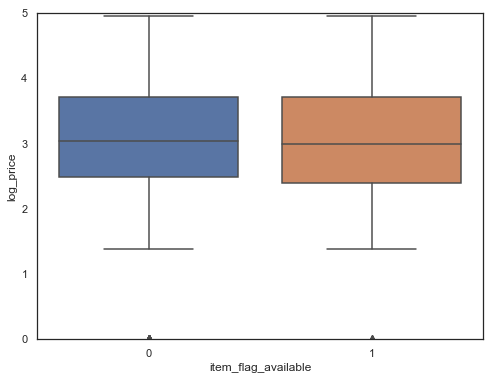

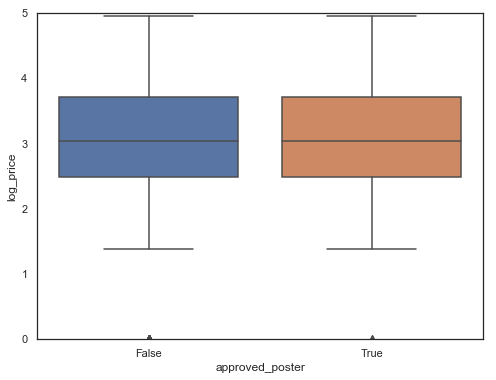

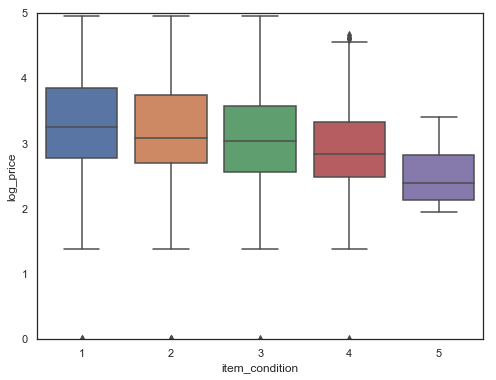

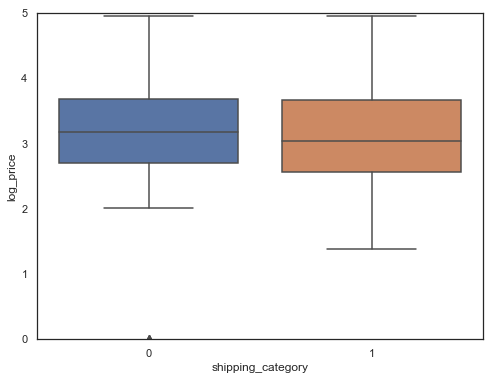

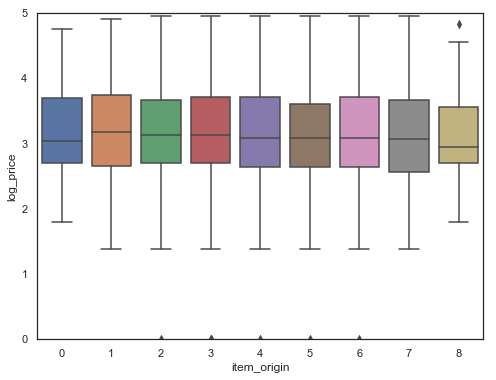

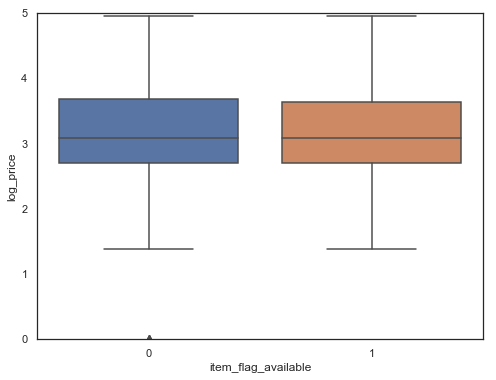

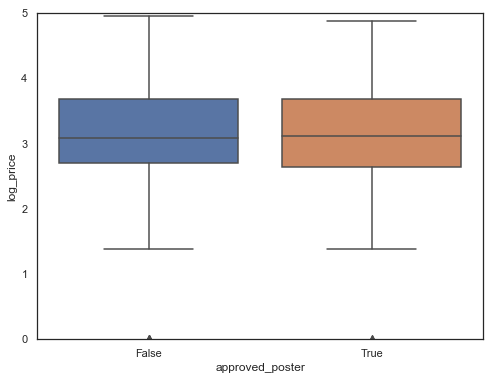

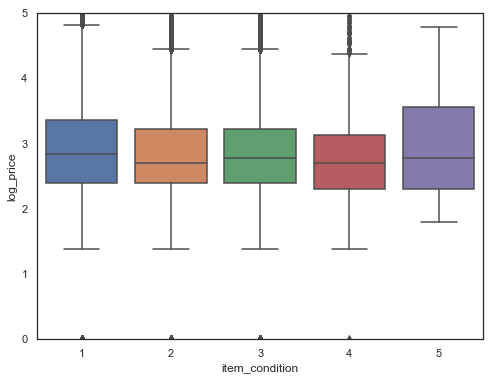

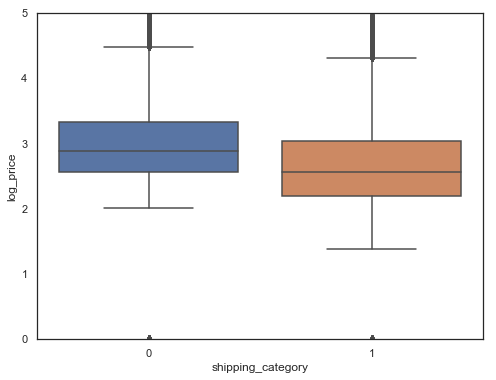

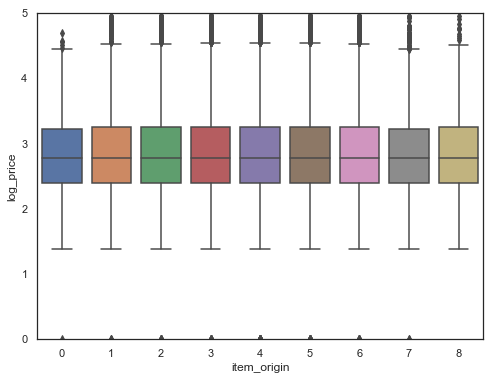

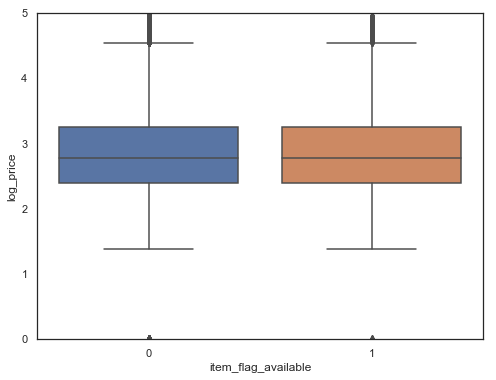

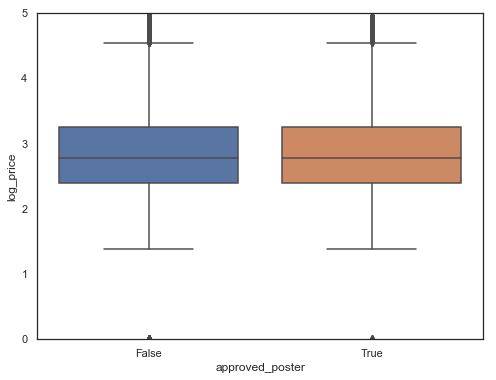

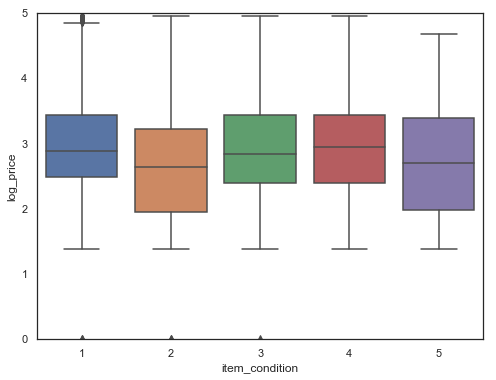

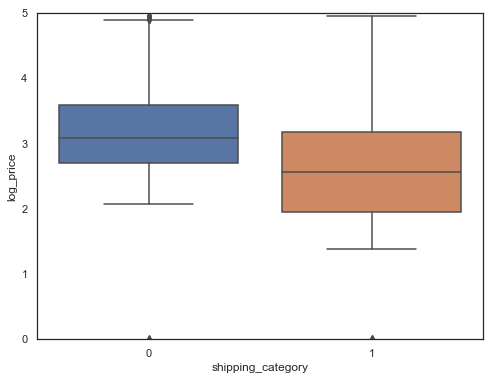

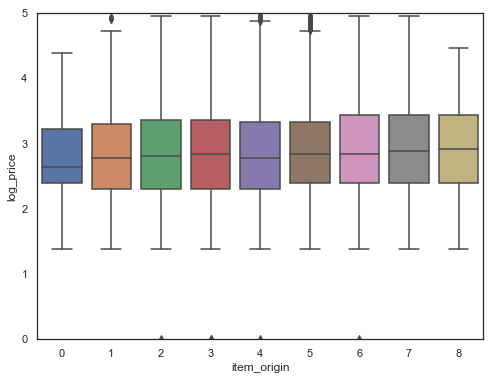

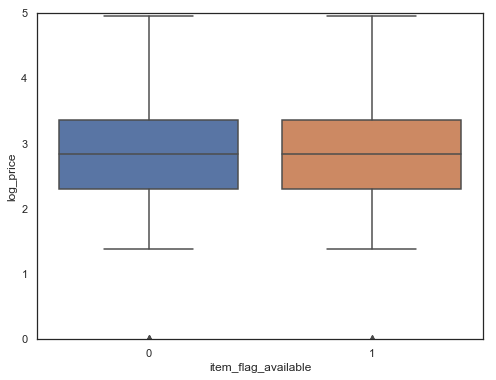

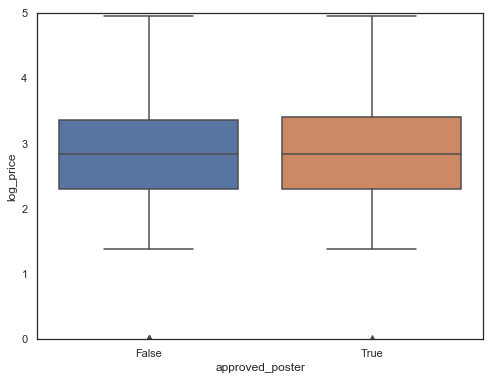

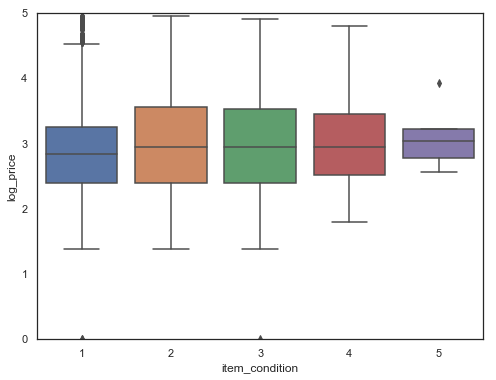

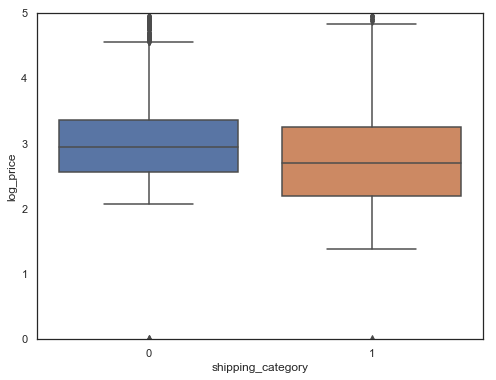

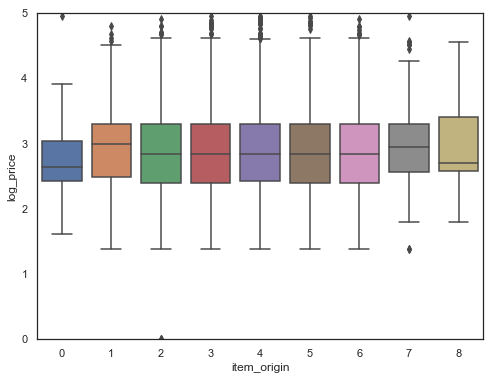

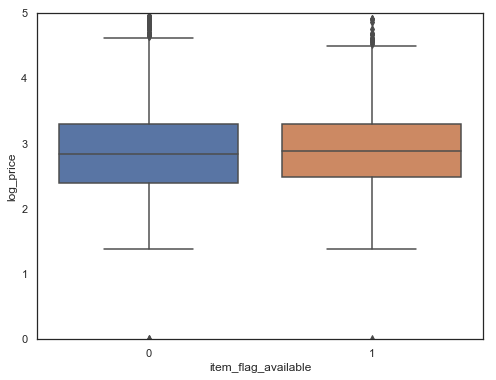

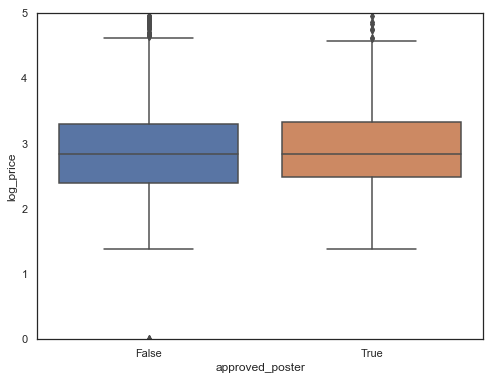

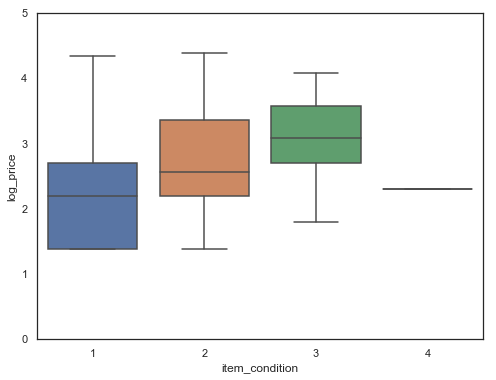

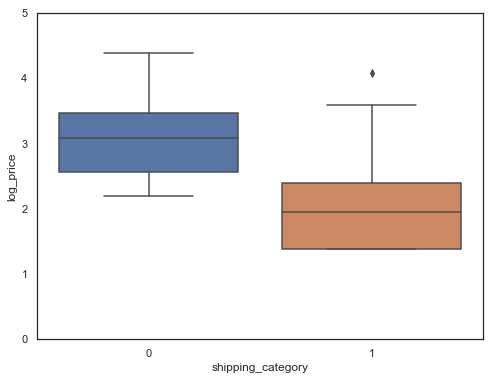

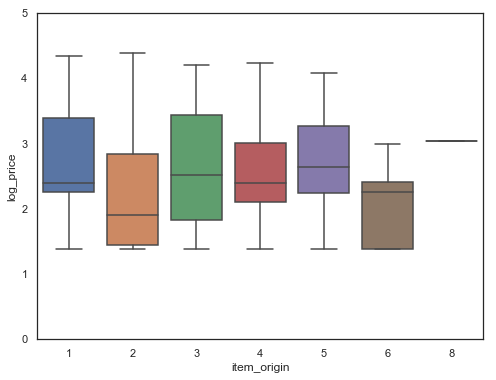

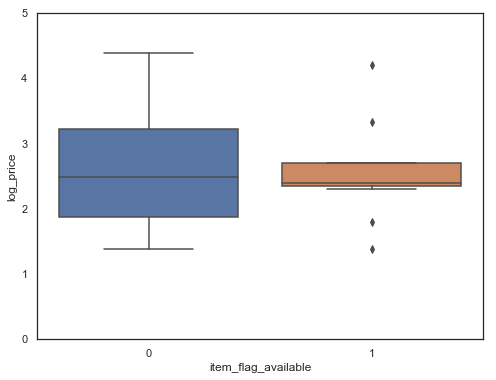

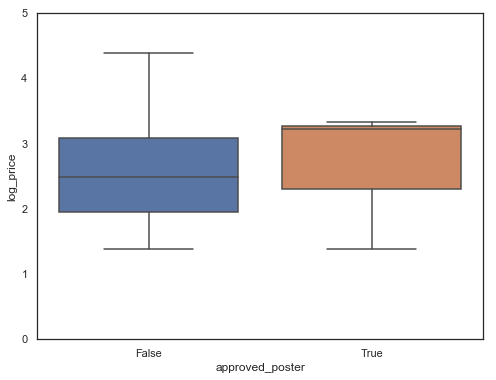

In [212]:
list_cat = df_new['category'].unique()
for cat in list_cat:
   
    df_temp = df_new[df_new['category']==cat]
    print("Category : ", cat)
    print(df_temp.shape)

    for var_d in var_dis:
        box_plot_disc(df_temp,var_d)

('Category : ', 'Beauty')
(111295, 16)


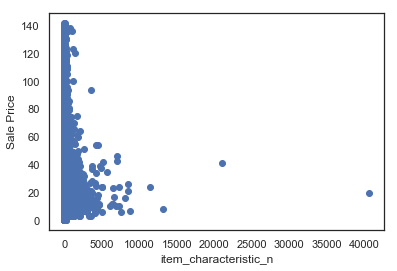

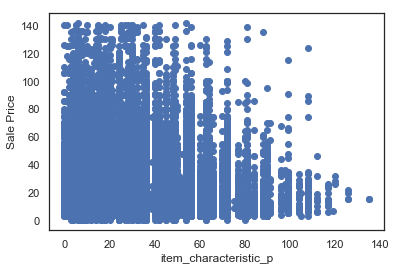

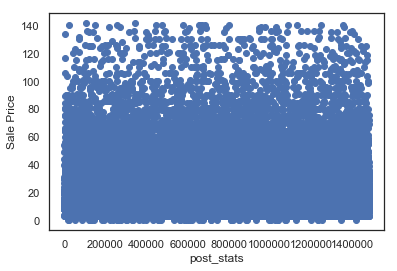

('Category : ', 'Women')
(446004, 16)


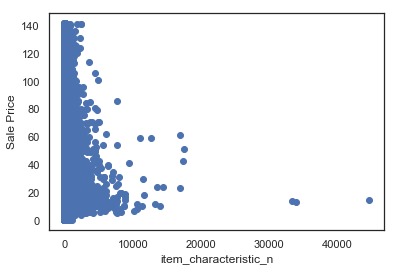

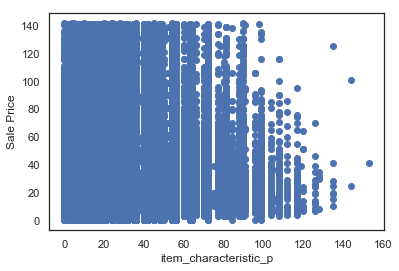

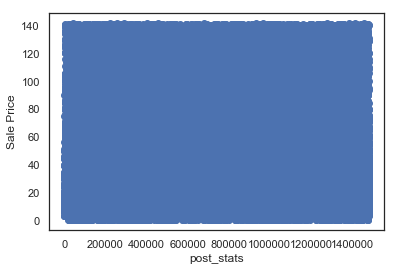

('Category : ', 'Men')
(68209, 16)


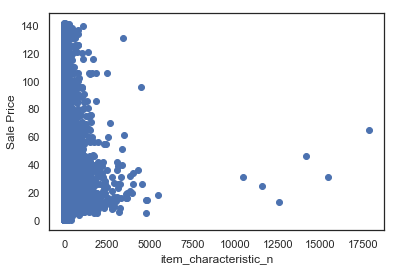

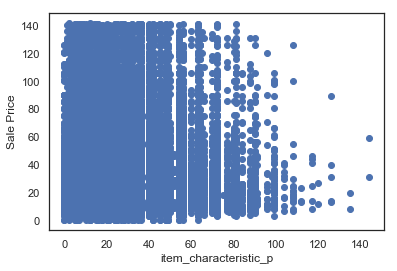

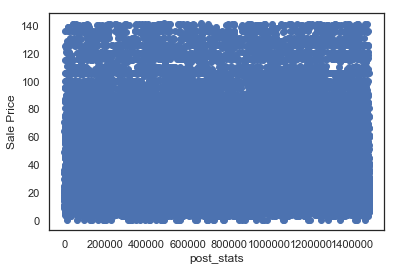

('Category : ', 'Home')
(26254, 16)


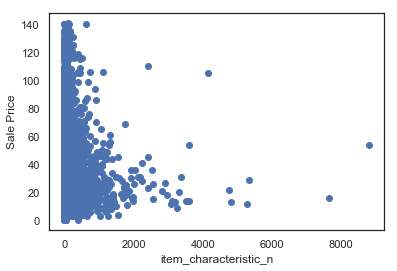

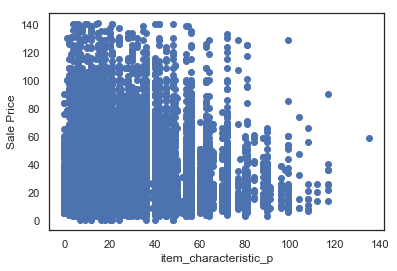

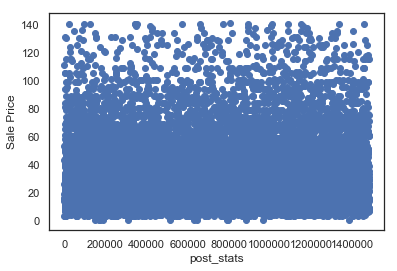

('Category : ', 'Electronics')
(54687, 16)


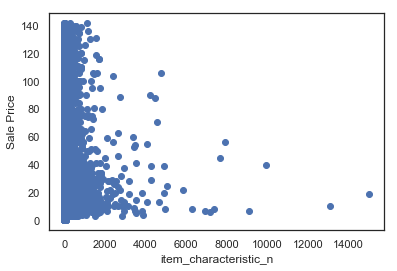

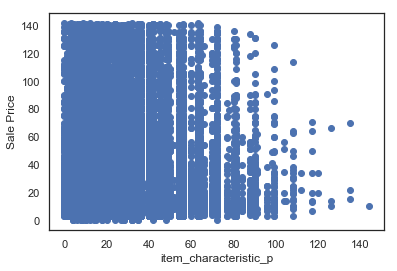

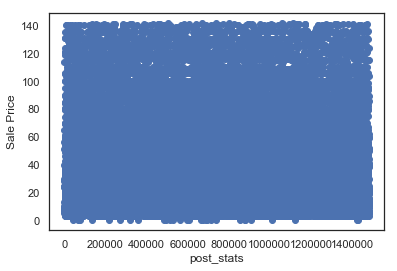

('Category : ', 'Sports & Outdoors')
(9119, 16)


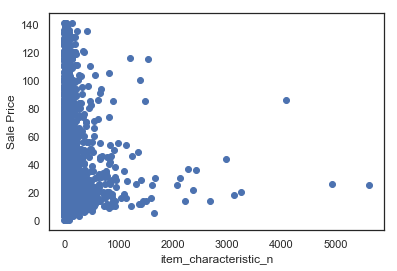

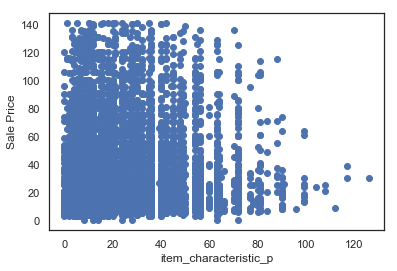

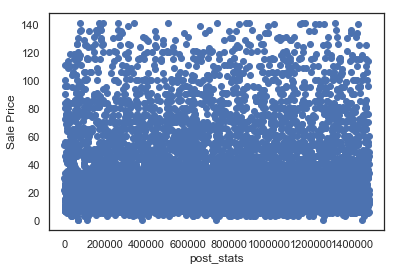

('Category : ', 'Kids')
(87259, 16)


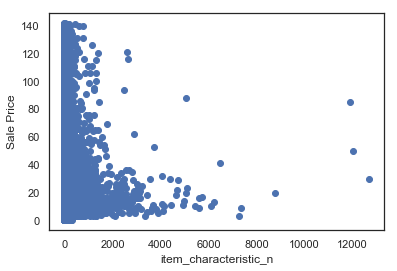

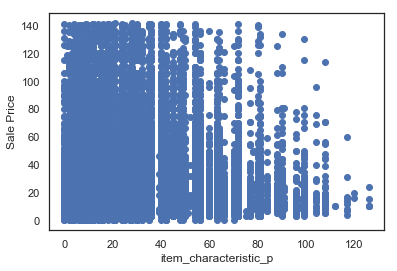

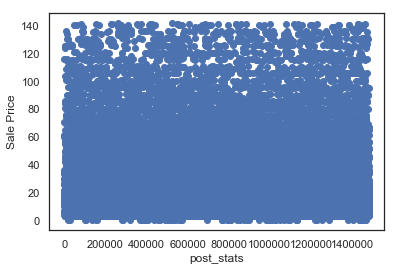

('Category : ', 'Vintage & Collectibles')
(20264, 16)


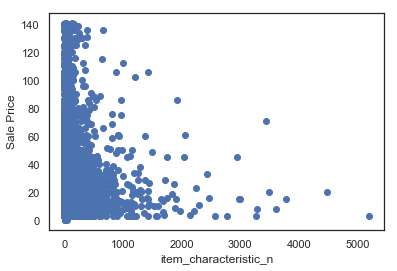

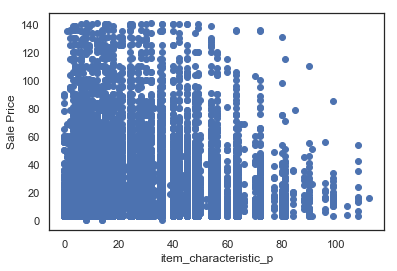

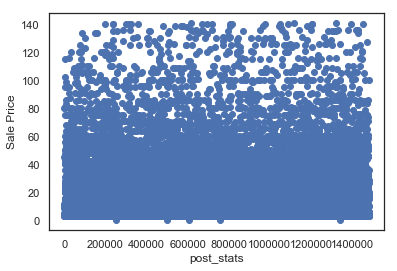

('Category : ', 'Other')
(6469, 16)


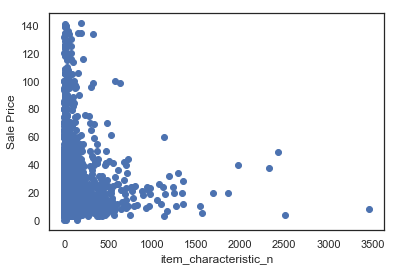

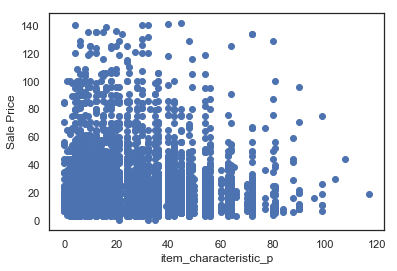

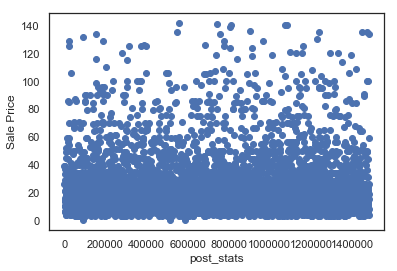

('Category : ', 'Handmade')
(70, 16)


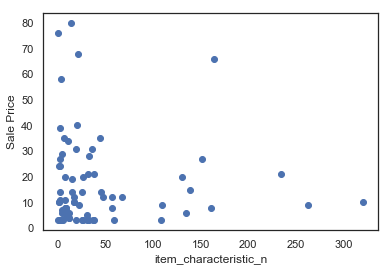

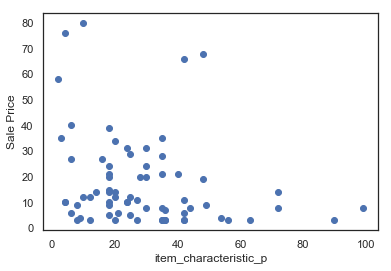

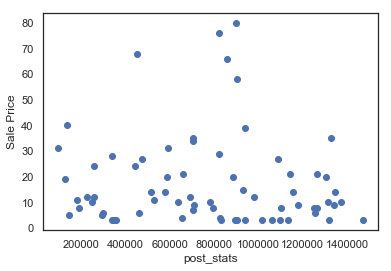

In [213]:
list_cat = df_new['category'].unique()
for cat in list_cat:
   
    df_temp = df_new[df_new['category']==cat]
    print("Category : ", cat)
    print(df_temp.shape)

    for var in var_cont:
         analyse_scatter_continous(df_temp, var)

Best category for price prediction model is Handmade due to its some variability of correlation with the sale price

## *Best Category Visualization*

### *1. Visualization - Without Log Transformation*

(70, 16)
('Variable : ', 'item_characteristic_n', ' in Handmade category')
('Variable : ', 'item_characteristic_p', ' in Handmade category')
('Variable : ', 'post_stats', ' in Handmade category')


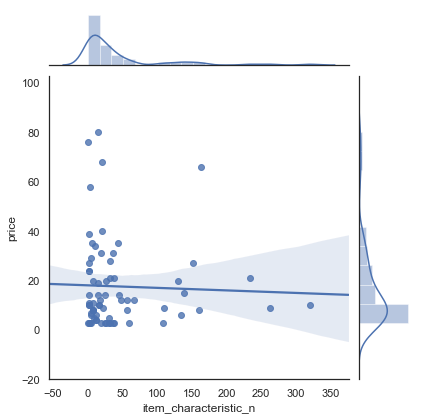

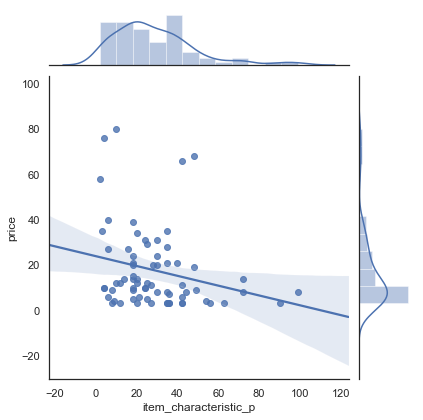

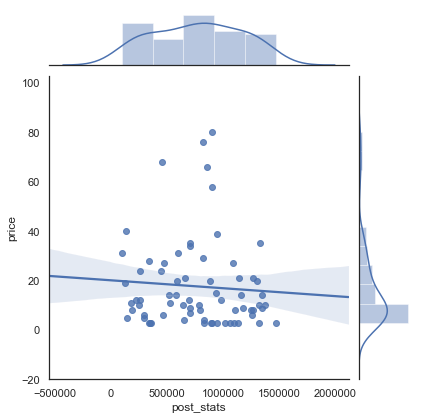

In [216]:
df_best = df_new[df_new['category']=='Handmade']
print(df_best.shape)

for var in var_cont:
    print("Variable : ",var ," in Handmade category")
    sns.jointplot(x=df_best[var], y=df_best['price'], kind='reg')

In [217]:
corr_list_best = var_cont + ["log_price","price"]
corrmat_best = df_best[corr_list_best].corr()
corrmat_best.style.background_gradient(cmap='coolwarm').set_precision(2)

,item_characteristic_n,item_characteristic_p,post_stats,log_price,price
item_characteristic_n,1,0.023,0.16,0.019,-0.037
item_characteristic_p,0.023,1,-0.065,-0.29,-0.24
post_stats,0.16,-0.065,1,-0.11,-0.07
log_price,0.019,-0.29,-0.11,1,0.9
price,-0.037,-0.24,-0.07,0.9,1


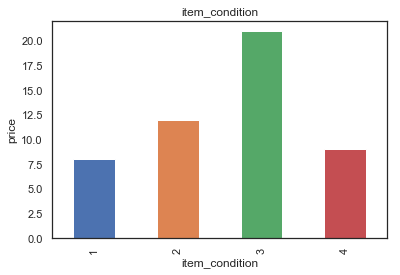

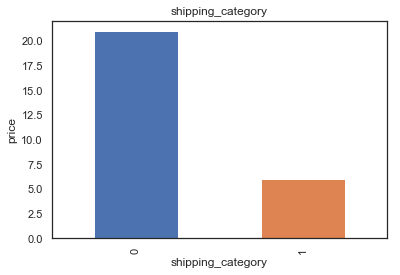

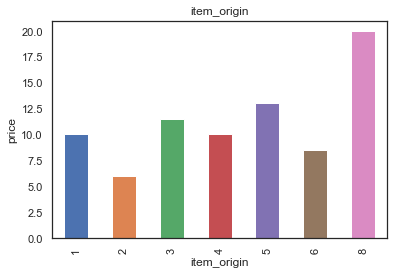

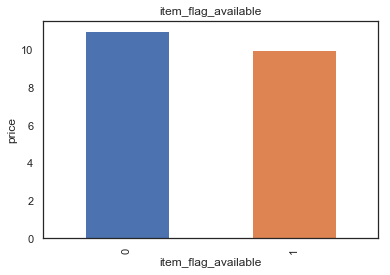

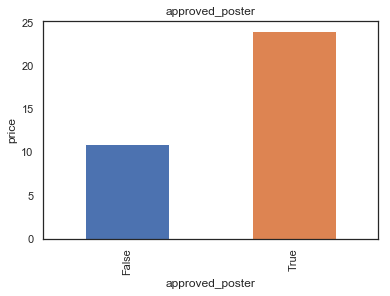

In [218]:
 for var_d in var_dis:
        bar_plot_disc(df_best,var_d)
        

### *2. Visualization - With Log Transformation*

(70, 16)
('Variable : ', 'item_characteristic_n', ' in Handmade category')
('Variable : ', 'item_characteristic_p', ' in Handmade category')
('Variable : ', 'post_stats', ' in Handmade category')


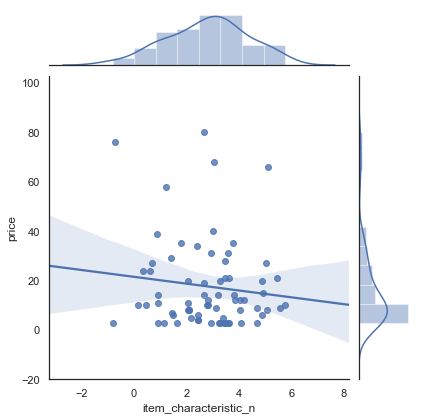

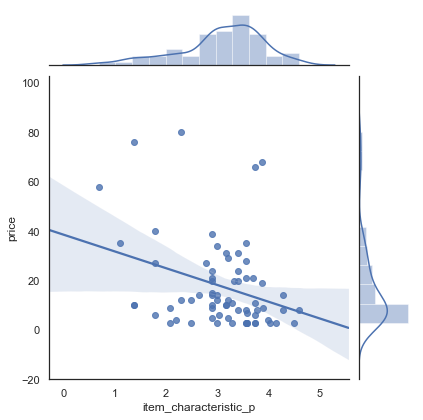

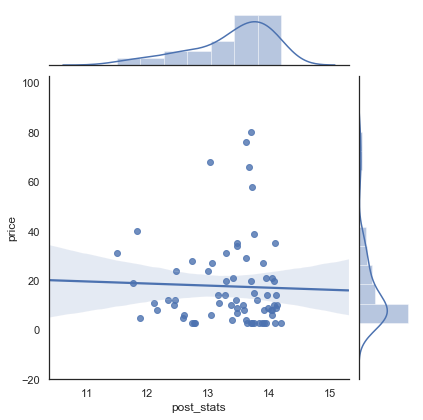

In [223]:
df_best = df_new[df_new['category']=='Handmade']
print(df_best.shape)

for var in var_cont:
    print("Variable : ",var ," in Handmade category")
    sns.jointplot(x=np.log(df_best[var]), y=df_best['price'], kind='reg')

# *Data Insights*

### *1. Most and Least Popular Brands*

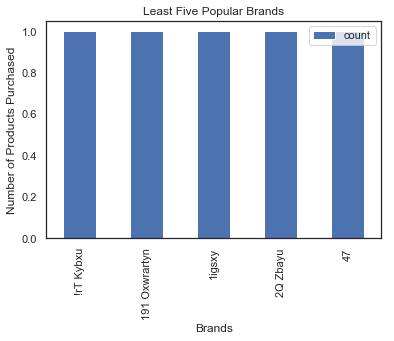

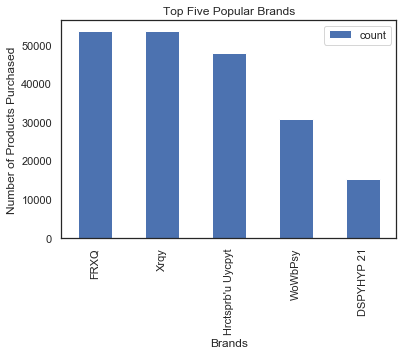

In [58]:
din_brands_pop = pd.DataFrame(train_df.groupby('item_brand')['title'].count())
din_brands_pop.columns = ['count']

din_brands_pop_s = din_brands_pop.nsmallest(5, 'count')
din_brands_pop_s.plot.bar()
plt.title("Least Five Popular Brands")
plt.xlabel("Brands")
plt.ylabel("Number of Products Purchased")
plt.show()

din_brands_pop_l = din_brands_pop.nlargest(5, 'count')
din_brands_pop_l.plot.bar()
plt.title("Top Five Popular Brands")
plt.xlabel("Brands")
plt.ylabel("Number of Products Purchased")
plt.show()




### *2. Most and Least Expensive Brands*

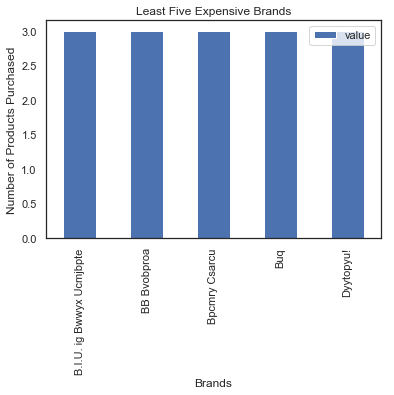

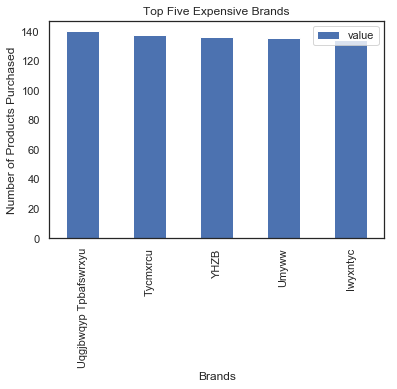

In [60]:
din_brands_price = pd.DataFrame(train_df.groupby('item_brand')['price'].mean())
din_brands_price.columns = ['value']

din_brands_price = din_brands_price[din_brands_price['value'] > 0]
din_brands_price_s = din_brands_price.nsmallest(5, 'value')
din_brands_price_s.plot.bar()
plt.title("Least Five Expensive Brands")
plt.xlabel("Brands")
plt.ylabel("Avg Price of Products Purchased")
plt.show()


din_brands_price_l = din_brands_price.nlargest(5, 'value')
din_brands_price_l.plot.bar()
plt.title("Top Five Expensive Brands")
plt.xlabel("Brands")
plt.ylabel("Avg Price of Products Purchased")
plt.show()



### *3. Most and Least Revenue Generating Brands*

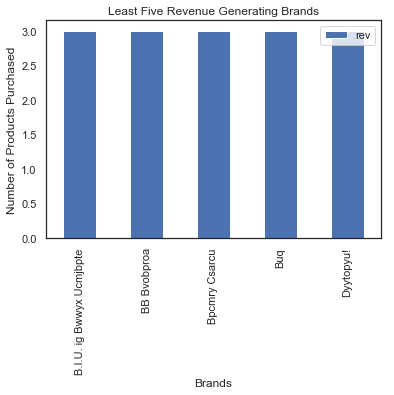

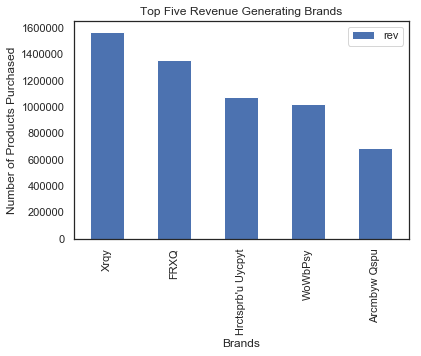

In [64]:
din_brands_rev = pd.DataFrame(train_df.groupby('item_brand')['price'].sum())
din_brands_rev.columns = ['rev']

din_brands_rev = din_brands_rev[din_brands_rev['rev'] > 0]
din_brands_rev_s = din_brands_rev.nsmallest(5, 'rev')
din_brands_rev_s.plot.bar()
plt.title("Least Five Revenue Generating Brands")
plt.xlabel("Brands")
plt.ylabel("Total Price of Products Purchased")
plt.show()


din_brands_rev_l = din_brands_rev.nlargest(5, 'rev')
din_brands_rev_l.plot.bar()
plt.title("Top Five Revenue Generating Brands")
plt.xlabel("Brands")
plt.ylabel("Total Price of Products Purchased")
plt.show()


### *4. Most and Least Popular Categories*

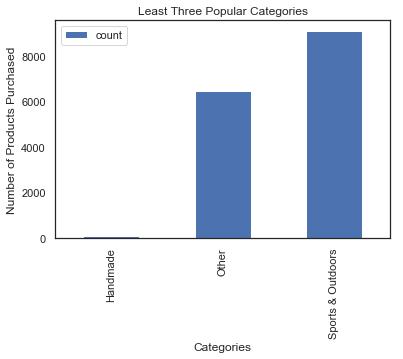

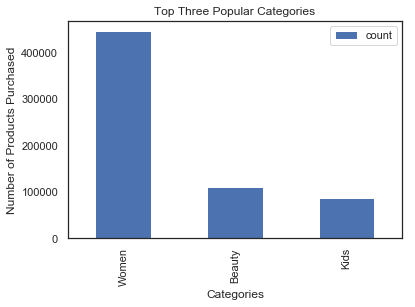

In [70]:
din_cat_pop = pd.DataFrame(train_df.groupby('category')['title'].count())
din_cat_pop.columns = ['count']

din_cat_pop_s = din_cat_pop.nsmallest(3, 'count')
din_cat_pop_s.plot.bar()
plt.title("Least Three Popular Categories")
plt.xlabel("Categories")
plt.ylabel("Number of Products Purchased")
plt.show()

din_cat_pop_l = din_cat_pop.nlargest(3, 'count')
din_cat_pop_l.plot.bar()
plt.title("Top Three Popular Categories")
plt.xlabel("Categories")
plt.ylabel("Number of Products Purchased")
plt.show()

### *5. Most and Least Expensive Categories*

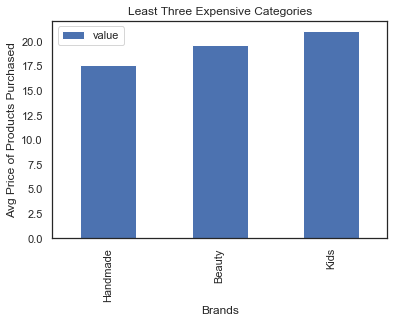

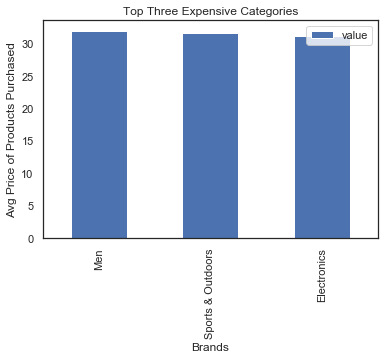

In [72]:
din_cat_price = pd.DataFrame(train_df.groupby('category')['price'].mean())
din_cat_price.columns = ['value']

din_cat_price = din_cat_price[din_cat_price['value'] > 0]
din_cat_price_s = din_cat_price.nsmallest(3, 'value')
din_cat_price_s.plot.bar()
plt.title("Least Three Expensive Categories")
plt.xlabel("Brands")
plt.ylabel("Avg Price of Products Purchased")
plt.show()


din_cat_price_l = din_cat_price.nlargest(3, 'value')
din_cat_price_l.plot.bar()
plt.title("Top Three Expensive Categories")
plt.xlabel("Brands")
plt.ylabel("Avg Price of Products Purchased")
plt.show()

### *3. Most and Least Revenue Generating Categories*

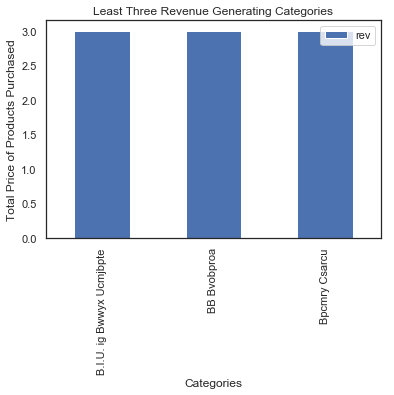

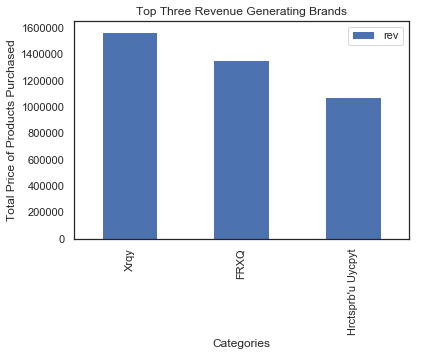

In [74]:
din_cat_rev = pd.DataFrame(train_df.groupby('item_brand')['price'].sum())
din_cat_rev.columns = ['rev']

din_cat_rev = din_cat_rev[din_cat_rev['rev'] > 0]
din_cat_rev_s = din_cat_rev.nsmallest(3, 'rev')
din_cat_rev_s.plot.bar()
plt.title("Least Three Revenue Generating Categories")
plt.xlabel("Categories")
plt.ylabel("Total Price of Products Purchased")
plt.show()


din_cat_rev_l = din_cat_rev.nlargest(3, 'rev')
din_cat_rev_l.plot.bar()
plt.title("Top Three Revenue Generating Brands")
plt.xlabel("Categories")
plt.ylabel("Total Price of Products Purchased")
plt.show()

# *Getting Best Category Data*

In [6]:
train_df = pd.read_csv("C:/Users/HP/Downloads/train_processed.csv")
train_df['approved_poster'] =  train_df['approved_poster'].apply(lambda x : 1 if x==True else 0)

train_df.head()


,id,title,item_condition,item_type,item_brand,price,shipping_category,description,item_characteristic_n,item_characteristic_p,item_origin,item_flag_available,post_stats,approved_poster
0,1459601,UBWY Tbpty Zpbh3gbpnzrpw Wrf Fbrxt,1,Beauty/Makeup/Lips,Tbpty,13.0,1,Ujbaf Dbarwg USWN SOT WRARTYN YNRTRSX IPBXN XY...,10.138889,48,4,0,22976,0
1,1334924,Uywdry utrcq,2,Electronics/Cameras & Photography/Camera & Pho...,NaN,3.0,1,Iwbcq Gsouy uywdry utrcq. Yltyxnbiwy. Fwozu rx...,5.198556,18,3,0,147631,0
2,215759,Tbxzyprxy Issq,3,Other/Books/Literature & Fiction,NaN,7.0,1,FPRCY DRPA XS WYUU Tbxzyprxy ig Ynjbpn Iwssp P...,8.351304,18,5,0,1266811,0
3,964284,Cpyj xycq,3,Women/Sweaters/Crewneck,NaN,10.0,1,Xs nyucprftrsx gyt,6.849827,16,7,0,518287,0
4,1159166,UOFYPUBWY 2016 XYJ IWOYTSSTM UABPT JBTCM,1,Electronics/Cell Phones & Accessories/Cell Pho...,NaN,28.0,1,* Xyj 100% rx Pytbrw Isl * Mrzm-vobwrtg abny *...,3.674306,56,2,0,323393,0


# *Developing Pipelines*

## *Data Filtering Pipelines*

### *1. N-famous brands*

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

class Select_Top_Brands(BaseEstimator, TransformerMixin):
    def __init__(self,num_brands=15,variables = None):
        self.num_brands = num_brands
            
    def fit(self,X,y=None):
        self.most_pop = []
        brands = pd.DataFrame(X.groupby('item_brand')['title'].count())
        brands.columns = ['title']
        brands = brands.nlargest(self.num_brands,['title'])
        self.most_pop = brands.index
        return self
    
    def transform(self,X):
        
        X = X.copy()
        X = X[X['item_brand'].isin(self.most_pop)]
        return X
        
        
top_brands = Select_Top_Brands(num_brands = 15)
top_brands.fit_transform(train_df).head()
        

,id,title,item_condition,item_type,item_brand,price,shipping_category,description,item_characteristic_n,item_characteristic_p,item_origin,item_flag_available,post_stats,approved_poster
6,426908,Arwwg Erf Fsocm,1,Women/Women's Handbags/Cosmetic Bags,Hrctsprb'u Uycpyt,12.0,1,"Ipbxn xyj, oxouyn Arwwg erf fsocm. Zpybt ts cb...",9.748283,18,3,0,1055675,0
10,453209,Hrctsprb uycpyt qxscqsot fbxtu wsxz XJT,1,"Women/Athletic Apparel/Pants, Tights, Leggings",Hrctsprb'u Uycpyt,37.0,0,Xs nyucprftrsx gyt,0.376800,45,3,0,1029329,0
11,522920,Pby Noxx Mbffg Mbwwsjyyx Aoz,1,Home/Kitchen & Dining/Coffee & Tea Accessories,Pby Noxx,66.0,0,Xyj Pby Noxx Mbffg Mbwwsjyyx arz,120.717057,25,5,0,959618,0
13,155819,Kout Ns Rt Cbuy rFmsxy 5u/c/uy,3,"Electronics/Cell Phones & Accessories/Cases, C...",Bffwy,9.0,0,Ouyn pyzowbpwg iot rx zpybt csxnrtrsx,82.433504,3,6,0,1326741,0
14,330955,HU FRXQ ioxnwy,1,Women/Athletic Apparel/Sports Bras,Hrctsprb'u Uycpyt,32.0,1,FPRCY DRPA ‼️ Nsx't buq ay dsp tmy wsjyut fprc...,15.491250,21,5,0,1151601,0


### *2. Required Category*

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class Generate_Pick_Category(BaseEstimator, TransformerMixin):
    def __init__(self,category=None):
        self.category = category
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X = X.copy()
        X['category'] = X['item_type'].apply(lambda cat: str(cat).split("/")[0])
        if self.category==None:
            return X
        else:
            X = X[X['category']==self.category]
            return X
        

best_category = Generate_Pick_Category(category='Women')
best_category.fit_transform(train_df).head()
            
    
        

,id,title,item_condition,item_type,item_brand,price,shipping_category,description,item_characteristic_n,item_characteristic_p,item_origin,item_flag_available,post_stats,approved_poster,category
3,964284,Cpyj xycq,3,Women/Sweaters/Crewneck,NaN,10.0,1,Xs nyucprftrsx gyt,6.849827,16,7,0,518287,0,Women
6,426908,Arwwg Erf Fsocm,1,Women/Women's Handbags/Cosmetic Bags,Hrctsprb'u Uycpyt,12.0,1,"Ipbxn xyj, oxouyn Arwwg erf fsocm. Zpybt ts cb...",9.748283,18,3,0,1055675,0,Women
7,933686,"wsoru horttsx jbwwyt /dpyy umrffrxz, xri",1,Women/Women's Accessories/Wallets,Wsoru Horttsx,170.0,1,botmyxtrc (kout uybpcm tmy utodd sx tmy ibpcsn...,13.223649,20,3,0,548865,0,Women
8,1008584,Pyyisq uyt,2,"Women/Athletic Apparel/Pants, Tights, Leggings",Pyyisq,20.0,1,Pyyisq ufsptu ipb & wyzzrxz uyt. Ylcywwyxt Ouy...,10.655698,6,4,0,473988,0,Women
10,453209,Hrctsprb uycpyt qxscqsot fbxtu wsxz XJT,1,"Women/Athletic Apparel/Pants, Tights, Leggings",Hrctsprb'u Uycpyt,37.0,0,Xs nyucprftrsx gyt,0.376800,45,3,0,1029329,0,Women


## *Data Preprocessing Piplines*

### *1. Outlier Detection & Removal*

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class Outlier_Removal(BaseEstimator, TransformerMixin):
    def __init__(self,var_interest=None):
        self.var_interest = var_interest
    
    def fit(self,X,y=None):
        return self
        
    def transform(self,X):
        X = X.copy()
        X =X[(np.abs(stats.zscore(X[self.var_interest])) < 3)]
        return X
        
    

### *2. Discrete Feature Imputer*

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class Discrete_Imputer(BaseEstimator, TransformerMixin):
    def __init__(self,variables=None):
        if not isinstance(variables,list):
            self.variables = [variables]
        else:
            self.variables = variables
    
    def fit(self,X,y=None):
        self.mode_dict = {}
        for var in self.variables:
            self.mode_dict[var] = X[var].mode()[0]
        return self
    
    def transform(self,X):
        X = X.copy()
        for var in self.variables:
            X[var].fillna(self.mode_dict[var],inplace=True)
        return X
    
    

### *3. Continuos Feature Imputer* 

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class Continuos_Imputer(BaseEstimator, TransformerMixin):
    def __init__(self,variables = None):
        if not isinstance(variables,list):
            self.variables = [variables]
        else:
            self.variables = variables
    
    def fit(self,X,y=None):
        self.mean_dict = {}
        for var in self.variables:
            self.mean_dict[var] = X[var].mean()
        return self
    
    def transform(self,X):
        X = X.copy()
        for var in self.variables:
            X[var].fillna(self.mean_dict[var],inplace=True)
        return X

## *Data Transformation Pipeline*

### *1. Log Transformer*

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class Log_Transformation(BaseEstimator, TransformerMixin):
    
    def __init__(self,variables=None):
        if not isinstance(variables,list):
            self.variables = [variables]
        else:
            self.variables = variables
            
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X = X.copy() 
        for var in self.variables:
            X[var] = np.log1p(X[var])
        return X
    

### *2. Feature Selector*

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

class Top_Feature_Selection(BaseEstimator, TransformerMixin):
    def __init__(self,variables=None):
        if not isinstance(variables,list):
            self.variables = [variables]
        else:
            self.variables = variables
            
    def fit(self,X,y=None):
        self.best_features = []
        sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
        sel_.fit(X[self.variables],y)
        self.best_features = X[self.variables].columns[(sel_.get_support())]
        return self
    
    def transform(self,X):
        X = X.copy()
        self.best_features = self.best_features
        X = X[self.best_features]
        return X
    

        
            

### *3. Feature Scaler*

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler

class Normalization(BaseEstimator, TransformerMixin):
    def __init__(self,variables=None):
        if not isinstance(variables,list):
            self.variables = [variables]
        else:
            self.variables = variables
            
    def fit(self,X,y=None):
        self.scaler_norm = MinMaxScaler()
        self.scaler_norm.fit(X[self.variables])
        return self
    
    def transform(self,X):
        X = X.copy()
        X[self.variables] = self.scaler_norm.transform(X[self.variables])
        return X
        
        

In [27]:
from sklearn.pipeline import Pipeline

NUM_BRANDS = 1500
CATEGORY = "Handmade"
VAR_INT = "price"
DISC_VAR = var_dis
CONT_VAR = var_cont
TOT_VAR = var_dis+var_cont

top_brands = Select_Top_Brands(num_brands = NUM_BRANDS )
top_brands = top_brands.fit_transform(train_df)
print top_brands.shape
best_category = Generate_Pick_Category(category=CATEGORY)
top_brands_cat = best_category.fit_transform(top_brands)
print top_brands_cat.shape
out_obj = Outlier_Removal(var_interest = VAR_INT)
top_cat_out = out_obj.fit_transform(top_brands_cat)
print top_cat_out.shape
disc_obj = Discrete_Imputer(variables = DISC_VAR)
top_cat_disc = disc_obj.fit_transform(top_cat_out)
print top_cat_disc.shape
cont_obj = Continuos_Imputer(variables=CONT_VAR)
top_cat_imp = cont_obj.fit_transform(top_cat_disc)
print top_cat_imp.shape
log_obj = Log_Transformation(variables=CONT_VAR)
top_cat_log = log_obj.fit_transform(top_cat_imp)
print top_cat_log.shape
feat_obj = Top_Feature_Selection(variables = TOT_VAR)
top_cat_feats = feat_obj.fit_transform(top_cat_log)
print top_cat_feats.shape
obj_norm = Normalization(variables = CONT_VAR)
top_cat_norm = obj_norm.fit_transform(top_cat_feats)
print top_cat_norm.shape



print "output.shape  = ",top_cat_norm.shape
top_cat_norm.head()









(838331, 14)
(59, 15)
(57, 15)
(57, 15)
(57, 15)
(57, 15)
(57, 7)
(57, 7)
output.shape  =  (57, 7)


,item_condition,shipping_category,item_origin,approved_poster,item_characteristic_n,item_characteristic_p,post_stats
8922,1,1,2,0,0.608896,0.736261,0.790012
113882,2,0,6,0,0.437258,0.818583,0.098172
116689,3,0,3,0,0.166357,0.654581,0.225434
154721,3,0,4,0,0.437350,0.570272,0.614447
156454,1,1,1,0,1.000000,0.621369,0.692770


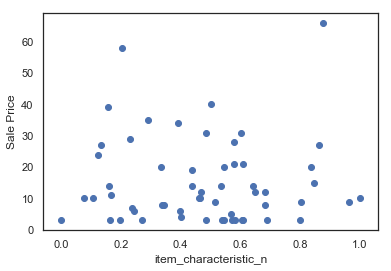

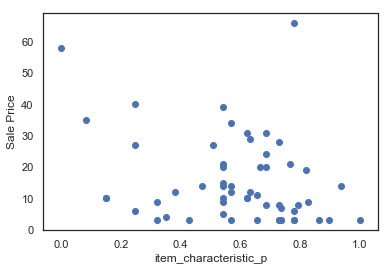

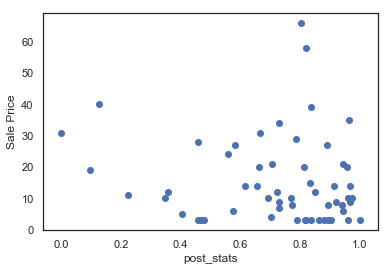

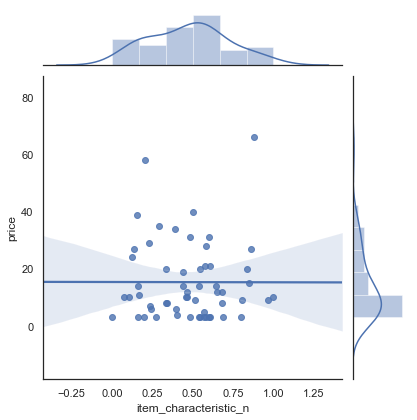

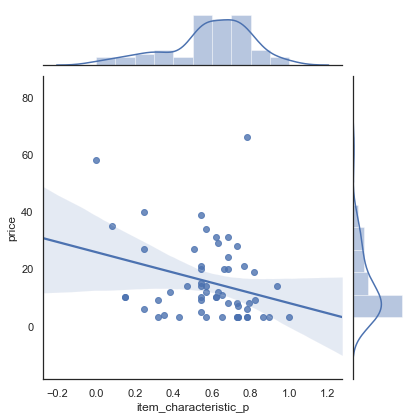

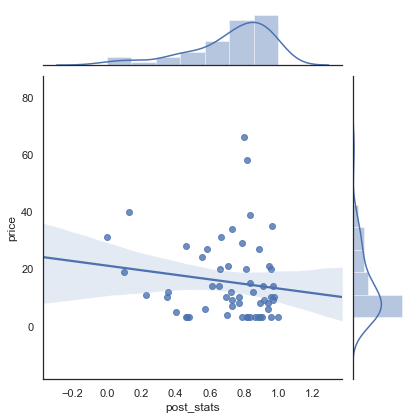

In [373]:
for var in var_cont:
         analyse_scatter_continous(top_cat_norm, var)
for var in var_cont:
    sns.jointplot(x=top_cat_norm[var], y=top_cat_norm['price'], kind='reg')

In [53]:
X = top_cat_norm.iloc[:,:-1]
y = top_cat_norm.iloc[:,-1]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X.head()


,item_condition,shipping_category,item_origin,approved_poster,item_characteristic_n,item_characteristic_p
8922,1,1,2,0,0.608896,0.736261
113882,2,0,6,0,0.437258,0.818583
116689,3,0,3,0,0.166357,0.654581
154721,3,0,4,0,0.437350,0.570272
156454,1,1,1,0,1.000000,0.621369


# *Machine Learning Pipeline* 

## *1. Linear Regression*

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import math

lreg=LinearRegression()
mse_lreg=cross_val_score(lreg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_lreg=np.mean(mse_lreg)
print(mean_lreg)
print('RMSE - Linear Regression = '+str(math.sqrt(-mean_lreg)))

-0.06392826575662562
RMSE - Linear Regression = 0.252840395816


## *2. Ridge Regression* 

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
param_ridge= {'alpha':[x for x in range(1,101)]}

clf_ridge = GridSearchCV(ridge,param_ridge, scoring='neg_mean_squared_error', cv=10)
clf_ridge.fit(X_train,y_train)
print("The best value of alpha is: ",clf_ridge.best_params_)
print("RMSE achieved with best alpha is: ",math.sqrt(-clf_ridge.best_score_))

('The best value of alpha is: ', {'alpha': 47})
('RMSE achieved with best alpha is: ', 0.24110783658212598)


## *3. Lasso Regression*

In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_lasso= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}

lasso=Lasso()
clf_lasso= GridSearchCV(lasso, param_lasso, scoring='neg_mean_squared_error', cv=15)
clf_lasso.fit(X_train,y_train)

print('The best value of Alpha is: ',clf_lasso.best_params_)
print("RMSE achieved with best alpha is: ",math.sqrt(-clf_lasso.best_score_))

('The best value of Alpha is: ', {'alpha': 0.01})
('RMSE achieved with best alpha is: ', 0.2445978031746508)


## *4. Elastic Net Regression*

In [38]:
from sklearn.linear_model import ElasticNetCV

param_elastic = {'l1_ratio':[0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]}

elastic = ElasticNetCV()
clf_elastic = GridSearchCV(elastic, param_elastic, scoring='neg_mean_squared_error', cv=10)
clf_elastic.fit(X_train,y_train)

print('The best value of l1_ratio is: ',clf_elastic.best_params_)
print("RMSE achieved with l1_ratio is: ",math.sqrt(-clf_elastic.best_score_))

('The best value of l1_ratio is: ', {'l1_ratio': 0.1})
('RMSE achieved with l1_ratio is: ', 0.24023420707437665)


## *5. Tree-based(XGB) Regressor*

In [39]:
from xgboost.sklearn import XGBRegressor

param_xgb= {'learning_rate' : [0.01],'n_estimators':[2000, 3460, 4000],'max_depth':[3], 'min_child_weight':[0,3,5],
                                     'colsample_bytree':[0.5,0.7],'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],
               'reg_lambda':[1,0.01,0.8,0.001,0.0001]}


xgb = XGBRegressor()

clf_xgb=GridSearchCV(xgb, param_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
clf_xgb.fit(X_train,y_train)
print "Best parameter for Xgb : ",clf_xgb.best_estimator_
print "RMSE achieved with best parameters: ", math.sqrt(-clf_xgb.best_score_)

Best parameter for Xgb :  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=5, missing=None, n_estimators=2000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0.1,
       reg_lambda=0.8, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
RMSE achieved with best parameters:  0.297509336031


C:\ProgramData\Anaconda2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


## *6. Ensemble Regressor* 

### *6.1 Voting Based Regressor*

In [411]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

vot_reg =  VotingRegressor([('Linear',lreg),('Ridge',ridge),('Lasso',lasso),('Elastic',elastic),('Xgb',xgb)])
vot_reg.fit(X_train,y_train)
y_pred_vote = vot_reg.predict(X_test)

mean_error_vote = mean_squared_error(y_test,y_pred_vote)
print "RMSE - Voting Based Regressor : ", math.sqrt(mean_error_vote)


ImportError: cannot import name VotingRegressor

### *6.2  Stacking Regressor*

In [417]:
from mlxtend.regressor import StackingRegressor
from sklearn.metrics import mean_squared_error

estimators = [('Linear',lreg),('Ridge',ridge),('Lasso',lasso),('Elastic',elastic),('Xgb',xgb)]

stack_reg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42))
stack_reg.fit(X_train,y_train)
y_pred_stack = stack_reg.predict(X_test)

mean_error_stack = mean_squared_error(y_test,y_pred_stack)
print "RMSE - Voting Based Regressor : ", math.sqrt(mean_error_stack)



  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:


grin 1.2.1 requires argparse>=1.1, which is not installed.
Could not install packages due to an EnvironmentError: [Error 5] Access is denied: 'c:\\programdata\\anaconda2\\lib\\site-packages\\pip\\_internal\\basecommand.py'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [487]:
!pip install joblib

  Using cached https://files.pythonhosted.org/packages/28/5c/cf6a2b65a321c4a209efcdf64c2689efae2cb62661f8f6f4bb28547cf1bf/joblib-0.14.1-py2.py3-none-any.whl


grin 1.2.1 requires argparse>=1.1, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# *End to End Deployment Pipeline*

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import dump, load
import pickle
import joblib

#Input parameters
NUM_BRANDS = 1500
CATEGORY = "Handmade"
VAR_INT = "price"
DISC_VAR = var_dis
CONT_VAR = var_cont
TOT_VAR = var_dis+var_cont

#Selecting top brands
top_brands = Select_Top_Brands(num_brands = NUM_BRANDS )
top_brands = top_brands.fit_transform(train_df)

#Selecting particular category
best_category = Generate_Pick_Category(category=CATEGORY)
top_brands_cat = best_category.fit_transform(top_brands)

#Removing outliers
out_obj = Outlier_Removal(var_interest = VAR_INT)
top_cat_out = out_obj.fit_transform(top_brands_cat)

#Splitting predictors and target variables
X = top_cat_out.drop(['price'],axis=1)
y = top_cat_out['price']

#Generating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [61]:
# Rendering an end to end deployment pipeline
pipe = Pipeline([('Discrete Imputer',Discrete_Imputer(variables = DISC_VAR)),
                 ('Continuos Imputer',Continuos_Imputer(variables=CONT_VAR)),
                 ('Log Transformer',Log_Transformation(variables=CONT_VAR)), 
                 ('Feature Selector',Top_Feature_Selection(variables = TOT_VAR)),
                 ('Feature Scaler', Normalization(variables = CONT_VAR)),
                 ('Regressor',xgb)])

#Fitting pipeline to the data set
pipe.fit(X_train,y_train)

# we persist the model for future use
pickle.dump(pipe, open('reg_pipeline.pkl', 'wb'))

#Predicting the outputs
y_pred_pipe = pipe.predict(X_test)

#Finding the errors
mean_error_pipe = mean_squared_error(y_test,y_pred_pipe)
print "RMSE: ", math.sqrt(mean_error_pipe)



RMSE:  15.2998795605


In [518]:
import pickle
import joblib

regression_pipeline = joblib.load(open('regression_pipeline.pkl','rb'))
regression_pipeline.predict(X_test)


KeyError: 'item_flag_available'

In [520]:
from joblib import dump, load





In [533]:
import pickle

regression1_pipeline = pickle.load(open('reg1_pipeline.pkl','rb'))
regression1_pipeline.predict(X_test)

array([11.540528 , 16.9067   , 14.162187 ,  3.8822742, 13.359194 ,
       16.98175  , 18.178082 , 17.585741 ,  8.693631 ,  4.109188 ,
       11.206872 , 29.25737  ], dtype=float32)

# *Feature Selection*

### *1. Feature Importance*

,Features,Importance
0,item_characteristic_n,0.216257
1,item_characteristic_p,0.205891
2,post_stats,0.168551
3,item_condition,0.112255
4,shipping_category,0.078241
5,item_origin,0.153952
6,item_flag_available,0.046926
7,approved_poster,0.017926


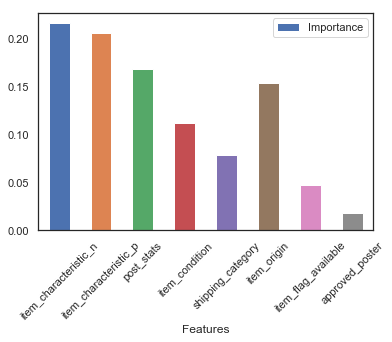

In [247]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

feature_imp = ExtraTreesClassifier()
feature_imp.fit(X_best,y_best)
features_df = pd.DataFrame({'Features': X_best.columns, 'Importance': feature_imp.feature_importances_})
features_df.plot.bar(x='Features', y='Importance', rot=45)
features_df

### *2. Filtering Features*

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel



sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
sel_.fit(X_train, y_train)

In [229]:
feat_list = var_cont + var_dis
X_best=df_best[feat_list]
y_best= df_best['price']

In [234]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel



sel_feat = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
sel_feat.fit(X_best, y_best)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [237]:
sel_feat.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True])

In [249]:
best_feats = X_best.columns[(sel_.get_support())]
print(best_feats)

Index([u'item_characteristic_n', u'item_characteristic_p', u'item_condition',
       u'shipping_category', u'item_origin', u'item_flag_available',
       u'approved_poster'],
      dtype='object')
